<a href="https://colab.research.google.com/github/jhlopesalves/data-science-practice-notebook/blob/main/Python/data_manipulation/pandas/joining_data_with_pandas/joining_data_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merging Data with Pandas

## Introduction

In real-world data analysis, information is rarely stored in a single monolithic table. Instead, data is typically distributed across multiple sources, each representing different aspects, entities, or time periods of the system under study. Combining these disparate tables - **merging** - is a foundational operation in data wrangling, much like performing SQL joins in a relational database. Effective merging allows you to enrich datasets, assemble complete records, and unlock the analytical power of relational thinking.

## The Essence of Merging

### What is a Merge (Join)?

A **merge** combines two or more tables (DataFrames) based on the values of one or more shared columns, called **keys**. This process is analogous to SQL joins, enabling you to bring together related information from separate sources.

### The Most Common Join: **Inner Join**

**Intuition:**  
An *inner join* retrieves only the rows that have matching key values in **both** DataFrames. It acts as a filter - retaining only those records for which the relationship exists in all datasets involved.

If you imagine each table as a circle in a Venn diagram, an inner join corresponds to the overlapping region: only values present in both circles are included in the result.<br>
This is the default behaviour in Pandas' `merge` function.

**When to use:**  
- When you want to analyse only the “shared universe” of your datasets - i.e., where data is available in all sources.

### Syntax: `pd.merge()`

The principal function for table merging in Pandas is `pd.merge()`. The basic usage is:

```python
import pandas as pd

merged_df = pd.merge(
    left=table1,
    right=table2,
    on="key_column"        # or on=["key1", "key2"] for composite keys
)
```
By default, this performs an **inner join** on the specified key(s).


### Example: Inner Join with a Common Key

Suppose you have two DataFrames, each with a `"user_id"` column representing the entity to join on:

```python
merged_df = pd.merge(left=users, right=purchases, on="user_id")
```
- Only users with purchase records - and vice versa - are included in the result.

### Handling Overlapping Column Names: The `suffixes` Argument

When both tables have columns with the same name (apart from the join key), Pandas automatically appends suffixes to distinguish them. You can customise these using the `suffixes` argument:

```python
merged_df = pd.merge(
    left=table1,
    right=table2,
    on="id",
    suffixes=("_left", "_right")
)
```
This ensures the resulting DataFrame remains unambiguous and self-explanatory.

## Best Practices

1) **Explicit key columns:** Always specify the `on=` argument to avoid subtle merge errors, especially when column names are similar but not identical.
2) **Review join types:** Inner joins are safe and conservative, but for broader analyses, consider left, right, or outer joins (see Pandas documentation).
3) **Inspect results:** Always check the shape and sample rows of your merged DataFrame (`.shape`, `.head()`) to ensure correctness.
4) **Column name hygiene:** Use `suffixes` to manage naming collisions for maximum interpretability.



In [180]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

### Downloading the require datasets to build the DataFrames

In [181]:
# Clone the repository without downloading any files yet (--no-checkout)
# The repository is placed in a temporary folder named 'temp_repo'.
print("Cloning repository structure...")
!git clone --no-checkout --depth 1 https://github.com/jhlopesalves/data-science-practice-notebook.git temp_repo

# Navigate into the temporary repository directory
%cd temp_repo

# Set up sparse checkout to target ONLY the folder you need.
# This is the modern, direct syntax for this command.
print("Setting sparse checkout to the target directory...")
!git sparse-checkout set Python/data_manipulation/pandas/joining_data_with_pandas/data

# Now, pull the actual files for only that specified folder
print("Downloading the specified folder...")
!git checkout

# The folder now exists inside the temporary directory.
# Move it from its nested path up to your main '/content/' directory.
print("Moving 'data' folder to the main directory...")
!mv Python/data_manipulation/pandas/joining_data_with_pandas/data /content/data

# Navigate back out of the temporary directory
%cd ..

# Remove the temporary folder and all its contents
print("Cleaning up temporary files...")
!rm -rf temp_repo

# Verify the final result. You should now see only the 'data/' folder.
print("\nVerification complete. Final directory contents:")
!ls -F

Cloning repository structure...
c:\Users\jhonm\Downloads\Code\Python\Courses\DataCamp\Python\data_manipulation\pandas\joining_data_with_pandas\temp_repo
Setting sparse checkout to the target directory...


fatal: destination path 'temp_repo' already exists and is not an empty directory.


Your branch is behind 'origin/main' by 6 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)
Moving 'data' folder to the main directory...
c:\Users\jhonm\Downloads\Code\Python\Courses\DataCamp\Python\data_manipulation\pandas\joining_data_with_pandas
Cleaning up temporary files...


'mv' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,


Verification complete. Final directory contents:



operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [182]:
wards = pd.read_pickle("data/ward.p")
census = pd.read_pickle("data/census.p")

In [183]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [184]:
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [185]:
wards_census = wards.merge(census, on="ward")
display(wards_census.head())

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [186]:
print(wards_census.columns)

Index(['ward', 'alderman', 'address_x', 'zip_x', 'pop_2000', 'pop_2010',
       'change', 'address_y', 'zip_y'],
      dtype='object')


In [187]:
wards_census = wards.merge(census, on="ward", suffixes=("_ward", "_cen"))
display(wards_census.head())

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_cen,zip_cen
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [188]:
print(wards_census.shape)

(50, 9)


### What column to merge on?
Chicago provides a list of taxicab owners and vehicles licensed to operate within the city, for public safety. Your goal is to merge two tables together. One table is called `taxi_owners`, with info about the taxi cab company owners, and one is called `taxi_veh`, with info about each taxi cab vehicle. Both the `taxi_owners` and `taxi_veh` tables have been loaded for you to explore.

Choose the column you would use to merge the two tables on using the `.merge()` method.

In [189]:
# Load the datasets taxi_owners and taxi_veh
taxi_veh = pd.read_pickle("data/taxi_vehicles.p")
taxi_owners = pd.read_pickle("data/taxi_owners.p")

In [190]:
taxi_veh.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [191]:
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


### Your first inner join
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the `taxi_owners` and `taxi_veh` tables together on the vid column. You can then use the merged table along with the `.value_counts()` method to find the most common fuel_type.

In [192]:
# Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh.
# Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid", suffixes=("_own","_veh"))
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [193]:
# Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.
print(taxi_own_veh["fuel_type"].value_counts)

<bound method IndexOpsMixin.value_counts of 0         HYBRID
1       GASOLINE
2       GASOLINE
3         HYBRID
4       GASOLINE
          ...   
3514      HYBRID
3515      HYBRID
3516      HYBRID
3517      HYBRID
3518      HYBRID
Name: fuel_type, Length: 3519, dtype: object>


### Inner joins and number of rows returned
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables.

In [194]:
# Merge wards and census on the ward column and save the result to wards_census.
ward_census = wards.merge(census, on="ward")
ward_census


,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637
5,6,Roderick T. Sawyer,8001 S. MARTIN LUTHER KING DRIVE,60619,54989,52341,-5%,150 WEST 74TH STREET,60636
6,7,Gregory I. Mitchell,2249 EAST 95TH STREET,60617,54593,51581,-6%,8549 SOUTH OGLESBY AVENUE,60617
7,8,Michelle A. Harris,8539 SOUTH COTTAGE GROVE AVENUE,60619,54039,51687,-4%,1346-1352 EAST 75TH STREET,60649
8,9,Anthony A. Beale,34 EAST 112TH PLACE,60628,52008,51519,-1%,11039-11059 SOUTH WENTWORTH AVENUE,60628
9,10,Susan Sadlowski Garza,10500 SOUTH EWING AVENUE,60617,56613,51535,-9%,10534 SOUTH AVENUE F,46394


# Merging Multiple DataFrames

In practical data analysis, you frequently encounter scenarios where data is distributed across more than two tables—perhaps different files for different years, separate tables for related entities, or multiple sources tracking overlapping phenomena. The ability to **merge multiple DataFrames** is essential for building a unified, coherent dataset from fragmented sources. This task, while conceptually an extension of pairwise merging, introduces new technical and organisational considerations.

This section presents a rigorous and pedagogical approach to merging more than two DataFrames in Pandas, emphasising underlying principles, technical best practices, and clear strategies for complex real-world workflows.

## Why Merge Multiple Tables?

**Normalised data:** Well-structured datasets are often “normalised,” with each table focusing on a single entity or relationship (e.g., users, transactions, products). <br>
**Incremental enrichment:** You may need to successively enrich a “core” dataset by merging in supplementary information (demographics, geography, transactions, etc.).<br>
**Time series and partitioned data:** Data split by year, month, or region often arrives as multiple files/tables requiring consolidation.<br>
**Integrating data from multiple systems:** Merging is required to assemble a holistic view from various sources or platforms.

## Principles and Theory: Merging Beyond Two Tables

Theoretically, a **multi-way merge** can be decomposed into a sequence of binary (pairwise) merges. The result of each merge serves as the left table in the next merge, and so on.  
However, practical complexities arise:
**Consistent join keys:** All merges must use compatible keys; mismatched keys lead to data loss or duplication.<br>
**Naming collisions:** Overlapping column names across tables require explicit disambiguation via `suffixes`.<br>
**Data loss:** Each inner join restricts the dataset to rows common to all merged tables; outer joins preserve more data but may introduce missing values.

## Single Merge vs. Multiple Merges

### Single (Pairwise) Merge

```python
merged = pd.merge(table1, table2, on="id")
```
- Simple, clear, and effective when you only need to combine two tables.

### Merging Multiple Tables: Stepwise Approach

To merge three or more tables, you typically proceed recursively:

```python
merged = pd.merge(table1, table2, on="id", suffixes=("_t1", "_t2"))
merged = pd.merge(merged, table3, on="id", suffixes=("", "_t3"))
```

Each call combines the result of the previous merge with the next table, one at a time.

### Example: Merging Multiple Tables with Composite Keys and Suffixes

Suppose you have several tables sharing composite keys (multiple columns), and some columns overlap in name:

```python
merged = pd.merge(
    table1,
    table2,
    on=["user_id", "date"],
    suffixes=("_t1", "_t2")
)
merged = pd.merge(
    merged,
    table3,
    on=["user_id", "date"],
    suffixes=("", "_t3")
)
```
- **Composite keys:** Use `on=[...]` to specify all join columns.
- **Suffixes:** Avoid naming collisions as each table is added.

## Chaining `.merge()` for Multiple DataFrames

When merging more than two DataFrames that all share the same join key(s), Pandas allows you to **chain** `.merge()` calls. This produces concise, readable code and maintains clarity about the order and logic of each join.

### Example: Merging Three or More Tables

#### Merging Three Tables

```python
merged = df1.merge(df2, on="col") \
            .merge(df3, on="col")
```
- The result of the first merge (`df1` with `df2`) is merged immediately with `df3` on the same key.

#### Merging Four Tables

```python
merged = df1.merge(df2, on="col") \
            .merge(df3, on="col") \
            .merge(df4, on="col")
```
- The process is associative and left-to-right:  
  `(((df1 + df2) + df3) + df4)`

#### Merging Five or More Tables

```python
merged = df1.merge(df2, on="col") \
            .merge(df3, on="col") \
            .merge(df4, on="col") \
            .merge(df5, on="col")
```
- Each additional table is merged into the accumulating result.

### Key Points and Best Practices

1) **Consistent join key:** All tables must share the same key(s). For composite keys, use `on=["col1", "col2"]`.
2) **Suffixes for name collisions:** If non-key columns have the same names, manage them with `suffixes` in each call to avoid ambiguity.
3) **Join type:** By default, `.merge()` performs an inner join. Specify `how="left"` (or `"outer"`, etc.) if needed for your logic.
4) **Readability:** For many tables or programmatic merges, consider using a loop or `functools.reduce()` for even greater generality and maintainability.

### Programmatic Merging with a Loop

If you have a list of DataFrames to merge:

```python
from functools import reduce

merged = reduce(lambda left, right: left.merge(right, on="col"), [df1, df2, df3, df4, df5])
```
This pattern is particularly useful when the number of tables is not known in advance (e.g., reading from a directory of CSV files).


### Advanced: Different Join Keys and Suffixes

If each merge uses different keys or needs custom suffixes, chain explicitly:

```python
merged = df1.merge(df2, on="key1", suffixes=("_a", "_b")) \
            .merge(df3, on="key2", suffixes=("", "_c")) \
            .merge(df4, on="key3", suffixes=("", "_d"))
```



In [195]:
licenses = pd.read_pickle("data/licenses.p")
biz_owners = pd.read_pickle("data/business_owners.p")

In [196]:
display(licenses.head())
display(licenses.shape)

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


(10000, 6)

In [197]:
display(biz_owners.head())
display(biz_owners.shape)

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


(21352, 4)

In [198]:
ward_licenses = wards.merge(licenses, on="ward", suffixes=("_ward", "_lic"))
display(ward_licenses.head())

,ward,alderman,address_ward,zip_ward,account,aid,business,address_lic,zip_lic
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


### One-to-many merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called `biz_owners`, to the `licenses` table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

In [199]:
# Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.
licenses_owners = licenses.merge(biz_owners, on="account")

In [200]:
# Group the licenses_owners dataframe by the 'title' column to analyze business owner titles
# Use the agg() function with a dictionary to specify aggregation operations for specific columns
# The dictionary format is: {'column_name': 'aggregation_function'}
counted_df = licenses_owners.groupby("title").agg({"account":"count"})
counted_df

,account
title,
ASST. SECRETARY,111
BENEFICIARY,4
CEO,110
DIRECTOR,146
EXECUTIVE DIRECTOR,10
GENERAL PARTNER,21
INDIVIDUAL,268
LIMITED PARTNER,26
MANAGER,134


In [201]:
# Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.
sorted_df = counted_df.sort_values(by="account", ascending=False)
display(sorted_df.head())

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


### Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (`station_name == 'Wilson'`) when riding Chicago's public transportation system on weekdays (`day_type == 'Weekday'`) in July (`month == 7`). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

In [202]:
cal = pd.read_pickle("data/cta_calendar.p")
ridership = pd.read_pickle("data/cta_ridership.p")
stations = pd.read_pickle("data/stations.p")

In [203]:
cal.head()

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday


In [204]:
ridership.head()

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719


In [205]:
stations.head()

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"


In [206]:
# Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. If you code takes too long to run, your merge conditions might be incorrect.
ridership_cal = ridership.merge(cal, on=["year", "month", "day"])
ridership_cal

,station_id,year,month,day,rides,day_type
0,40010,2019,1,1,576,Sunday/Holiday
1,40010,2019,1,2,1457,Weekday
2,40010,2019,1,3,1543,Weekday
3,40010,2019,1,4,1621,Weekday
4,40010,2019,1,5,719,Saturday
...,...,...,...,...,...,...
3280,41660,2019,12,27,13898,Weekday
3281,41660,2019,12,28,9485,Saturday
3282,41660,2019,12,29,7581,Sunday/Holiday
3283,41660,2019,12,30,15332,Weekday


In [207]:
# Extend the previous merge to three tables by also merging the stations table.
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']).merge(stations, on="station_id")
ridership_cal_stations

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"
...,...,...,...,...,...,...,...,...
3280,41660,2019,12,27,13898,Weekday,Lake/State,"(41.884809, -87.627813)"
3281,41660,2019,12,28,9485,Saturday,Lake/State,"(41.884809, -87.627813)"
3282,41660,2019,12,29,7581,Sunday/Holiday,Lake/State,"(41.884809, -87.627813)"
3283,41660,2019,12,30,15332,Weekday,Lake/State,"(41.884809, -87.627813)"


In [208]:
# Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.
filter_criteria  = ((ridership_cal_stations["month"] == 7)
                    & (ridership_cal_stations["day_type"] == "Weekday")
                    & (ridership_cal_stations["station_name"] == "Wilson"))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, "rides"].sum())

140005


### Three table merge
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the `licenses` and `wards` tables with this new income-by-zip-code table called `zip_demo`.

In [209]:
zip_demo = pd.read_pickle("data/zip_demo.p")

In [210]:
zip_demo.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [211]:
# Starting with the licenses table, merge to it the zip_demo table on the zip column. Then merge the resulting table to the wards table on the ward column. Save result of the three merged tables to a variable named licenses_zip_ward.
licenses_zip_ward = licenses.merge(zip_demo, on="zip").merge(wards, on="ward")
licenses_zip_ward.head()

,account,ward,aid,business,address_x,zip_x,income,alderman,address_y,zip_y
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,50164,Susan Sadlowski Garza,10500 SOUTH EWING AVENUE,60617
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,42335,Edward M. Burke,2650 WEST 51ST STREET,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609,33959,George Cardenas,3476 SOUTH ARCHER AVENUE,60608
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613,79565,Tom Tunney,3223 NORTH SHEFFIELD AVENUE,60657


In [212]:
# Group the results of the three merged tables by the column alderman and find the median income.
display(licenses_zip_ward.groupby("alderman").agg({"income":"median"}))


,income
alderman,
Ameya Pawar,66246.0
Anthony A. Beale,38206.0
Anthony V. Napolitano,82226.0
Ariel E. Reyboras,41307.0
Brendan Reilly,110215.0
Brian Hopkins,87143.0
Carlos Ramirez-Rosa,66246.0
Carrie M. Austin,38206.0
Chris Taliaferro,55566.0


### One-to-many merge with multiple tables
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The `land_use` table has info on the percentage of vacant land by city ward. The `census` table has population by ward, and the `licenses` table lists businesses by ward.

In [213]:
land_use = pd.read_pickle("data/land_use.p")
land_use.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [214]:
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [215]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [216]:
# Merge land_use and census on the ward column. Merge the result of this with licenses on the ward column, using the suffix _cen for the left table and _lic for the right table. Save this to the variable land_cen_lic.
land_cen_lic = land_use.merge(census, on="ward").merge(licenses, on="ward", suffixes=("_cen", "_lic"))
land_cen_lic.head()

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [217]:
# Group land_cen_lic by ward, pop_2010 (the population in 2010), and vacant, then count the number of accounts. Save the results to pop_vac_lic.
# The as_index=False parameter keeps the grouping columns as regular columns instead of making them the index
# The agg() function applies the count aggregation to the 'account' column
pop_vac_lic = land_cen_lic.groupby(["ward", "pop_2010", "vacant"], as_index=False).agg({"account":"count"})
pop_vac_lic.head()

,ward,pop_2010,vacant,account
0,1,56149,2,253
1,10,51535,14,130
2,11,51497,5,201
3,12,52235,4,255
4,13,53722,1,101


In [218]:
# Sort pop_vac_lic by vacant, account, an pop_2010 in descending, ascending, and ascending order respectively. Save it as sorted_pop_vac_lic.
sorted_pop_vac_lic = pop_vac_lic.sort_values(by=["vacant", "account", "pop_2010"], ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
display(sorted_pop_vac_lic.head())

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156


# Left Join

## Overview and Intuition

In relational data analysis, joining tables is the act of combining records from two or more tables based on shared key values. While the **inner join** includes only rows where keys exist in **both** tables, the **left join** (also called a *left outer join*) is more inclusive: it returns all rows from the **left** table and fills in matching data from the **right** table - using missing values (`NaN`) where no match exists.

**Intuitive Principle:**  

 The **left table** is "guaranteed" - all its records are preserved, regardless of whether there is corresponding data in the right table. <br>
 The **right table** only contributes data where the join key matches the left. <br>
 If you imagine a Venn diagram, a left join corresponds to the entirety of the left circle, plus any overlapping data from the right.<br>

**Why use a left join?**<br>
1) To **preserve the full set** of observations from a main dataset, adding supplementary data where available. <br>
2) To identify **missing or unmatched** entries in a secondary dataset. <br>
3) To annotate, enrich, or audit a dataset without losing the original structure or dropping any data.


## Comparing Inner Join and Left Join

| Join Type   | What is included?                                                         |
|-------------|---------------------------------------------------------------------------|
| Inner Join  | Only rows where the join key exists in **both** left and right tables      |
| Left Join   | **All** rows from left table, plus matching data from right (or NaN)      |


## Example: Left Join in Action

Suppose you have:

**Left Table**  
| user_id | name   |
|---------|--------|
| 1       | Alice  |
| 2       | Bob    |
| 3       | Carlos |

**Right Table**  
| user_id | purchase_amount |
|---------|----------------|
| 1       | 100            |
| 2       | 50             |

**Left Join Result**  
| user_id | name   | purchase_amount |
|---------|--------|----------------|
| 1       | Alice  | 100            |
| 2       | Bob    | 50             |
| 3       | Carlos | NaN            |

Carlos is preserved in the result, even though he has no corresponding record in the right table. <br>


## Pandas Syntax for a Left Join

The key argument is `how="left"` in `pd.merge()`:

```python
import pandas as pd

merged = pd.merge(
    left=left_table,
    right=right_table,
    on="user_id",
    how="left"
)
```
You may also use composite keys with `on=["key1", "key2"]`. <br>
Columns with no matching right-side value will be filled with `NaN`.


## Best Practices

1) Always use `how="left"` when you want to preserve all rows from the primary (left) dataset.<br>
2) Inspect the result for unmatched rows (those with `NaN` in right table columns).<br>
3) Left joins are especially useful for feature engineering, data enrichment, and identifying gaps between datasets.

In [219]:
movies = pd.read_pickle("data/movies.p")
movies = movies.rename(columns={"title":"original_title"})

In [220]:
display(movies.head())
display(movies.shape)

,id,original_title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


(4803, 4)

In [221]:
taglines = pd.read_pickle("data/taglines.p")
display(taglines.head())
display(taglines.shape)

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


(3955, 2)

In [222]:
# Merge with left join
movie_taglines = movies.merge(taglines, on="id", how="left")
display(movie_taglines.head())
display(movie_taglines.shape)

,id,original_title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


(4803, 5)

In [223]:
financials = pd.read_pickle("data/financials.p")
display(financials.head())
display(financials.shape)

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


(3229, 3)

In [224]:
# Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.
movies_financials = movies.merge(financials, on="id", how="left")
display(movies_financials.head())
display(movies_financials.shape)

,id,original_title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


(4803, 6)

In [225]:
# Count the number of rows in movies_financials with a null value in the budget column.
number_of_missing_fin = movies_financials["budget"].isna().sum()
# Print the number of movies missing financials
print(number_of_missing_fin)

1574


# Other Joins: Right Join and Outer Join

Beyond inner and left joins, Pandas supports **right join** and **outer join**. Each join type serves a distinct analytical need. Mastering them gives you full control over how records are included or excluded when merging multiple data sources.

## Right Join

### Intuition and Principle

A **right join** (or *right outer join*) preserves all rows from the **right** table and merges matching rows from the **left** table. Where there is no corresponding left record, missing values (`NaN`) fill in.

The **right table** is "guaranteed": every row is kept. <br>
The **left table** only contributes rows with a matching key.

**Use cases:**  
1) When the right table is your “master list” or reference.
2) When you wish to annotate every entry in the right table with information from the left.

### Example: Right Join in Action

**Left Table**

| id | name   |
|----|--------|
| 1  | Alice  |
| 2  | Bob    |

**Right Table**

| id | score |
|----|-------|
| 1  | 95    |
| 2  | 88    |
| 3  | 77    |

**Right Join Result**

| id | name   | score |
|----|--------|-------|
| 1  | Alice  | 95    |
| 2  | Bob    | 88    |
| 3  | NaN    | 77    |

Note how id=3 appears in the result, even though it is not present in the left table.


### Pandas Syntax: Right Join

```python
import pandas as pd

merged = pd.merge(
    left=left_table,
    right=right_table,
    on="id",
    how="right"
)
```
For different key names, use `left_on="left_id", right_on="right_id"`.


## Outer Join

### Intuition and Principle

An **outer join** (also called *full outer join*) preserves all rows from **both** tables, matching them where possible by key. Where no match exists, missing values (`NaN`) fill in from the missing side.

Think of the union of both tables’ keys. <br>
No data is lost—every unique key from either table appears in the result.

**Use cases:**  
1) When you want a comprehensive dataset, showing all records and explicitly displaying gaps.
2) For comparing datasets, auditing coverage, or combining partially overlapping sources.


### Example: Outer Join in Action

**Left Table**

| id | name   |
|----|--------|
| 1  | Alice  |
| 2  | Bob    |

**Right Table**

| id | score |
|----|-------|
| 2  | 88    |
| 3  | 77    |

**Outer Join Result**

| id | name   | score |
|----|--------|-------|
| 1  | Alice  | NaN   |
| 2  | Bob    | 88    |
| 3  | NaN    | 77    |

All keys from both tables are present, with `NaN` where there is no match.


### Pandas Syntax: Outer Join with Suffixes

```python
merged = pd.merge(
    left=left_table,
    right=right_table,
    left_on="left_id",
    right_on="right_id",
    how="outer",
    suffixes=("_left", "_right")
)
```
- `left_on` and `right_on` specify different key columns if names differ.
- `how="outer"` signals a full join.
- `suffixes` resolve naming collisions for non-key columns present in both tables.

## Join Types

| Join Type    | Includes...                                      | When to Use                                 |
|--------------|--------------------------------------------------|---------------------------------------------|
| inner        | Only keys present in **both** tables             | Intersection/overlap analysis               |
| left         | All keys from **left** table                     | Enrich/annotate a primary dataset           |
| right        | All keys from **right** table                    | Annotate or audit against reference table   |
| outer        | All keys from **either** table                   | Full audit, gap analysis, combining sources |



In [226]:
movie_to_genres = pd.read_pickle("data/movie_to_genres.p")
display(movie_to_genres.head())
display(movie_to_genres.shape)

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


(12160, 2)

In [227]:
# Looking at data
tv_genre = movie_to_genres[movie_to_genres["genre"] == "TV Movie"]
display(tv_genre)

,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie
10835,158150,TV Movie
11096,205321,TV Movie
11282,231617,TV Movie


In [228]:
# Filtering the data to find TV Movie genre records
# Using boolean indexing to create a mask for filtering
m = movie_to_genres["genre"] == "TV Movie"
tv_genre = movie_to_genres[m]
display(tv_genre)

,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie
10835,158150,TV Movie
11096,205321,TV Movie
11282,231617,TV Movie


In [229]:
# Merge with right join
# This preserves all TV Movie records from tv_genre (right table) and adds movie info where available
# Using different column names for the join: 'id' from movies and 'movie_id' from tv_genre
tv_movies = movies.merge(tv_genre, how="right",
                         left_on="id", right_on="movie_id")
display(tv_movies.head())

,id,original_title,popularity,release_date,movie_id,genre
0,10947,High School Musical,16.536374,2006-01-20,10947,TV Movie
1,13187,A Charlie Brown Christmas,8.701183,1965-12-09,13187,TV Movie
2,22488,Love's Abiding Joy,1.128559,2006-10-06,22488,TV Movie
3,78814,We Have Your Husband,0.102003,2011-11-12,78814,TV Movie
4,153397,Restless,0.812776,2012-12-07,153397,TV Movie


In [230]:
m = movie_to_genres["genre"] == "Family"
family = movie_to_genres[m].head(3)
family

,movie_id,genre
5,12,Family
33,35,Family
111,105,Family


In [231]:
m = movie_to_genres["genre"] == "Comedy"
comedy = movie_to_genres[m].head(3)
comedy

,movie_id,genre
1,5,Comedy
7,13,Comedy
35,35,Comedy


In [232]:
family_comedy = family.merge(comedy, on="movie_id", how="outer",
                             suffixes=("_fam", "_com"))
display(family_comedy)

,movie_id,genre_fam,genre_com
0,5,NaN,Comedy
1,12,Family,NaN
2,13,NaN,Comedy
3,35,Family,Comedy
4,105,Family,NaN


### Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called `scifi_movies` and another table of action movies called `action_movies`. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

In [233]:
# Defining action_movies table
m = movie_to_genres["genre"] == "Action"
action_movies = movie_to_genres[m]

In [234]:
# Defining scifi_movies table
m = movie_to_genres["genre"] == "Science Fiction"
scifi_movies = movie_to_genres[m]

In [235]:
# Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.
action_scifi = action_movies.merge(scifi_movies, on="movie_id", how="right")
display(action_scifi)

,movie_id,genre_x,genre_y
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
...,...,...,...
530,335866,NaN,Science Fiction
531,347548,NaN,Science Fiction
532,360188,NaN,Science Fiction
533,367551,Action,Science Fiction


In [236]:
# Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.
action_scifi = action_movies.merge(scifi_movies, on="movie_id", how="right", suffixes=("_act", "_sci"))
display(action_scifi.head())

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [237]:
# From action_scifi, subset only the rows where the genre_act column is null.
scifi_only = action_scifi[action_scifi["genre_act"].isna()]

In [238]:
# Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.
movies_and_scifi_only = movies.merge(scifi_only, left_on="id", right_on="movie_id", how="inner")
display(movies_and_scifi_only)

,id,original_title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction
...,...,...,...,...,...,...,...
253,245703,Midnight Special,32.717853,2016-02-18,245703,NaN,Science Fiction
254,3509,A Scanner Darkly,26.093043,2006-05-25,3509,NaN,Science Fiction
255,42188,Never Let Me Go,30.983397,2010-09-15,42188,NaN,Science Fiction
256,18045,The Dark Hours,1.428483,2005-03-11,18045,NaN,Science Fiction


In [239]:
movies_to_genres = pd.read_pickle("data/movie_to_genres.p")
movies_to_genres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [240]:
pop_movies = movies.sort_values(by="popularity", ascending=False).head(10).rename(columns={"original_title":"title"})
pop_movies.head()

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13


In [241]:
# Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.
genres_movies = movie_to_genres.merge(pop_movies, how="right", left_on="movie_id", right_on="id")
genres_movies.head()

,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581305,2015-06-17
1,211672,Adventure,211672,Minions,875.581305,2015-06-17
2,211672,Animation,211672,Minions,875.581305,2015-06-17
3,211672,Family,211672,Minions,875.581305,2015-06-17
4,157336,Drama,157336,Interstellar,724.247784,2014-11-05


In [242]:
# Group genres_movies by genre and count the number of id values.
genre_count = genres_movies.groupby("genre").agg({"id":"count"})
display(genre_count)

,id
genre,
Action,7
Adventure,9
Animation,2
Comedy,3
Drama,2
Family,2
Fantasy,1
Science Fiction,6
Thriller,4


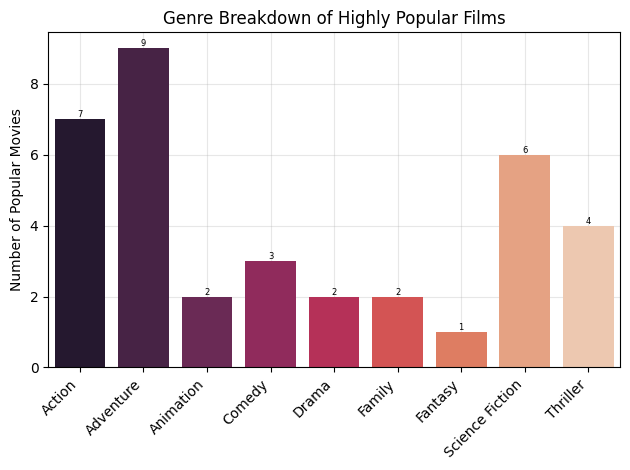

In [243]:
# Plot a bar chart of the genre_count
fig, ax = plt.subplots()

sns.barplot(data=genre_count, x=genre_count.index, y=genre_count["id"], palette="rocket", hue=genre_count.index)

ax.set(xlabel="", ylabel="Number of Popular Movies", title="Genre Breakdown of Highly Popular Films")

ax.set_axisbelow(True)
ax.grid(True, alpha=0.3, zorder=0)
# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=6)

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and `null` where they do not match, you can use it to find rows that do not have a match in the other table.

To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table must be called `iron_1_actors`, and Iron Man 2 table is called `iron_2_actors`.

In [244]:
casts = pd.read_pickle("data/casts.p")
casts.head()

,movie_id,cast_id,character,gender,id,name
7,5,22,Jezebel,1,3122,Sammi Davis
8,5,23,Diana,1,3123,Amanda de Cadenet
9,5,24,Athena,1,3124,Valeria Golino
3,5,25,Elspeth,1,3125,Madonna
12,5,26,Eva,1,3126,Ione Skye


In [245]:
casts_only = casts.drop(["movie_id", "cast_id", "gender"], axis=1)
casts_only.head()

,character,id,name
7,Jezebel,3122,Sammi Davis
8,Diana,3123,Amanda de Cadenet
9,Athena,3124,Valeria Golino
3,Elspeth,3125,Madonna
12,Eva,3126,Ione Skye


In [246]:
iron_1_actors = casts_only[casts_only["id"].isin([17857,   12052,    1229,   18288,   57451,   57452,    3223,
          9048,  173810,    6162,   15277,   12708,   40275,    2231,
         17200,  163671,   78299,   54809,  944830, 1209417,   95698,
       1209418,   62037,  183439,  109669,  104669, 1209419,  195442,
        142213, 1209702, 1209703,  183037, 1209704,  214951,  205362,
        203468,  939869, 1209705, 1209706, 1209707, 1209708, 1209709,
       1209710,  206423,  133121,  181895,   62843,  204606,  210842,
        205720, 1005698,    7624, 1209711,   90721,  169681, 1209712,
       1209713,  169642,   27031,   34544,  150669, 1209714, 1209715,
       1004624,  984619, 1209716, 1209717,  970218, 1209718, 1202546,
       1209719, 1209720, 1209721, 1209722, 1089759, 1096679, 1209723,
       1209724,   78434, 1209725, 1209726, 1209727, 1209728, 1209729,
       1209730, 1209731, 1429470])]

In [247]:
# Create iron_2_actors DataFrame
iron_2_actors = casts_only[casts_only["id"].isin([
    2295, 1245, 6807, 2231, 12052, 1896, 15277, 57451, 81364, 51072,
    113676, 3223, 52865, 21134, 9048, 6162, 73641, 14741, 1209714, 216601,
    1265248, 1265249, 1177850, 586090, 1228219, 40275, 1230885, 1265250,
    1079976, 7624, 1265251, 118755, 210292, 1265252, 57563, 95777, 81957,
    1265795, 997632, 1265796, 201883, 1265797, 1265798, 1003061, 1265799,
    1202543, 1265800, 1265801, 571240, 1265802, 108725, 1265803, 995348,
    1265804, 1265805, 1265806, 83274, 168925, 1265807, 98999, 1265808,
    1265809, 1265810, 1265811, 1265812, 1265813, 1265814, 1265815, 1078574,
    1265816, 1236642, 1231548, 1265817, 1265818, 1265819, 1225936, 97447,
    1265820, 1265821, 1265822, 1265823, 1265824, 1265825, 1265826, 193946,
    1265827, 201951, 1200895, 1200313, 101037, 1265828, 1265829, 1186481,
    1265830, 992389, 1265831, 208056, 1265832, 1265833, 223048, 1197358,
    1265834, 1265835, 1265836, 77824, 1197040, 1265837, 1265838, 1265839,
    92189, 1265840, 1265841, 1122811, 1205141, 1429470, 1213109
])]

In [248]:
display(iron_1_actors.head())
iron_1_actors.shape

,character,id,name
11,Branded Marine,95698,Kevin Foster
45,Boxing Fan (uncredited),1209723,Robert McMurrer
0,The Dude,1229,Jeff Bridges
17,Reese,34544,Joshua Harto
0,Dr. Mark Powell,1229,Jeff Bridges


(458, 3)

In [249]:
display(iron_2_actors.head())
iron_2_actors.shape

,character,id,name
1,Nola Rice,1245,Scarlett Johansson
12,Alma Jr. (Age 19),51072,Kate Mara
1,Charlotte,1245,Scarlett Johansson
20,Basher Tarr (uncredited),1896,Don Cheadle
9,Basher Tarr,1896,Don Cheadle


(547, 3)

In [250]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on='id', how="outer", suffixes=("_1", "_2"))
display(iron_1_and_2)
iron_1_and_2.shape

,character_1,id,name_1,character_2,name_2
0,The Dude,1229,Jeff Bridges,NaN,NaN
1,Dr. Mark Powell,1229,Jeff Bridges,NaN,NaN
2,Jack Lucas,1229,Jeff Bridges,NaN,NaN
3,Michael Faraday,1229,Jeff Bridges,NaN,NaN
4,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
...,...,...,...,...,...
8942,Dr. Taryl Jenkins (uncredited),1429470,Nick W. Nicholson,Reporter (uncredited),Nick W. Nicholson
8943,Dr. Taryl Jenkins (uncredited),1429470,Nick W. Nicholson,Stark Expo Attendee (uncredited),Nick W. Nicholson
8944,Dr. Taryl Jenkins (uncredited),1429470,Nick W. Nicholson,Saloon Guy (uncredited),Nick W. Nicholson
8945,Dr. Taryl Jenkins (uncredited),1429470,Nick W. Nicholson,White House Reporter (uncredited),Nick W. Nicholson


(8947, 5)

In [251]:
# Create an index that returns True if name_1 or name_2 are null, and False otherwise.
m = ((iron_1_and_2['name_1'].isna()) |
     (iron_1_and_2['name_2'].isna()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                   character_1    id        name_1 character_2 name_2
0                     The Dude  1229  Jeff Bridges         NaN    NaN
1              Dr. Mark Powell  1229  Jeff Bridges         NaN    NaN
2                   Jack Lucas  1229  Jeff Bridges         NaN    NaN
3              Michael Faraday  1229  Jeff Bridges         NaN    NaN
4  Obadiah Stane / Iron Monger  1229  Jeff Bridges         NaN    NaN


In [252]:
iron_1_and_2_merge = iron_1_actors.merge(iron_2_actors, how="outer")
display(iron_1_and_2_merge)
iron_1_and_2_merge.shape

,character,id,name
0,'Old and Lame' Show Attendee,81364,Olivia Munn
1,'Old and Lame' Show Attendee,142213,Nazanin Boniadi
2,'Wild Bill' Wharton,6807,Sam Rockwell
3,(voice),14741,Philippe Bergeron
4,10 Rings Gangster,1265250,Ali Khan
...,...,...,...
876,Zeus Carver,2231,Samuel L. Jackson
877,Zoe Tripp,51072,Kate Mara
878,Zog (voice),2231,Samuel L. Jackson
879,Zorianna Kit,90721,Zorianna Kit


(881, 3)

In [253]:
iron_1_and_2_merge.isna().sum()

character    0
id           0
name         0
dtype: int64

# Merging a Table to Itself

A **self-join** is the process of merging a table with itself. This operation is essential in scenarios where records in a dataset are hierarchically or sequentially related, or when modelling networks and graph-like structures. Self-joins are conceptually similar to ordinary joins, but both the left and right tables are the same DataFrame—often with different keys, enabling you to “look up” related records within the same dataset.

This section covers the motivation, best practices, and technical procedures for merging a table to itself using Pandas, with an emphasis on careful, readable code and robust handling of key relationships.

## Why Merge a Table to Itself?

Common real-world scenarios include:

- **Hierarchical relationships:**  
  For example, employee-manager, category-subcategory, or parent-child relationships in trees or organisational charts.
- **Sequential relationships:**  
  Linking records in a sequence, such as steps in a process, chapters in a book, or “next” and “previous” pointers in linked data.
- **Graph data:**  
  Exploring relationships such as friends-of-friends, network links, or reference chains.

Self-joins allow you to enrich each record with data from its “related” counterpart, using foreign keys or reference columns within the same table.


## Mechanics: The Self-Join in Pandas

To merge a table with itself, use `.merge()`—but specify **different keys** for the left and right:

```python
merged = df.merge(
    df,
    left_on="reference_column",
    right_on="id_column",
    suffixes=("_left", "_right")
)
```
 `left_on`: the key column(s) in the left (original) DataFrame.<br>
 `right_on`: the key column(s) in the right (copy) DataFrame.<br>
 `suffixes`: distinguishes columns from each “side” of the join for clarity.<br>

## Table Structure: Before and After Self-Join

**Original Table (single DataFrame):**

| id | reference | title  |
|----|-----------|--------|
| 1  | NaN       | Alpha  |
| 2  | 1         | Beta   |
| 3  | 2         | Gamma  |

**Self-Join Result (joined on reference = id):**

| id_left | reference | title_left | id_right | reference_right | title_right |
|---------|-----------|------------|----------|----------------|-------------|
| 2       | 1         | Beta       | 1        | NaN            | Alpha       |
| 3       | 2         | Gamma      | 2        | 1              | Beta        |

<br>
Each row in the result links a record to its “related” record (e.g., child to parent, sequel to original, etc.).


## Syntax: Merging a Table to Itself

### Standard Self-Join (Inner Join by Default)

```python
merged = df.merge(
    df,
    left_on="reference_column",
    right_on="id_column",
    suffixes=("_src", "_ref")
)
print(merged.head())
```

### Selecting Relevant Columns for Clarity

Often, you want to focus on specific columns from each side of the join:

```python
print(merged[["title_src", "title_ref"]].head())
```

### Left Self-Join

To preserve all records from the original table, use a **left join**:

```python
merged = df.merge(
    df,
    left_on="reference_column",
    right_on="id_column",
    how="left",
    suffixes=("_src", "_ref")
)
print(merged.head())
```
This ensures every row from the “source” table appears, even if there is no matching reference.


## When to Use Self-Joins

**Hierarchical relationships:** To reconstruct trees, look up parent records, or traverse levels of a hierarchy.<br>
**Sequential relationships:** To chain records (e.g., previous/next, sequels, chronological events).<br>
**Graph data:** To explore connections, paths, or adjacency in network-like datasets.<br>
**Data enrichment:** To annotate each row with properties of a related row within the same dataset.<br>


## Best Practices

- **Use explicit suffixes** to avoid ambiguity in column names.
- **Carefully specify keys**: Misaligned or missing keys may yield more or fewer rows than expected, or introduce incorrect relationships.
- **Inspect the result**: Check the merged shape, sample values, and use `.isna()` to detect unlinked cases.
- **Limit columns**: Select only the necessary columns from each “side” for clarity and performance.


In [254]:
sequels = pd.read_pickle("data/sequels.p")
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [255]:
original_sequels = sequels.merge(sequels, left_on="sequel", right_on="id", suffixes=("_org", "_seq"))

original_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,862,Toy Story,863,863,Toy Story 2,10193
1,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
2,675,Harry Potter and the Order of the Phoenix,767,767,Harry Potter and the Half-Blood Prince,<NA>
3,121,The Lord of the Rings: The Two Towers,122,122,The Lord of the Rings: The Return of the King,<NA>
4,120,The Lord of the Rings: The Fellowship of the Ring,121,121,The Lord of the Rings: The Two Towers,122


In [256]:
original_sequels[["title_org", "title_seq"]].head()

,title_org,title_seq
0,Toy Story,Toy Story 2
1,Toy Story 2,Toy Story 3
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers


In [257]:
original_sequels = sequels.merge(sequels, left_on="sequel", right_on="id", how="left", suffixes=("_org", "_seq"))

original_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,19995,Avatar,<NA>,<NA>,NaN,<NA>
1,862,Toy Story,863,863,Toy Story 2,10193
2,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
3,597,Titanic,<NA>,<NA>,NaN,<NA>
4,24428,The Avengers,<NA>,<NA>,NaN,<NA>


### Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called `crews`, which has columns `id`, `job`, and `name`. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

In [258]:
crews = pd.read_pickle("data/crews.p")
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [259]:
#To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.
crews_self_merged = crews.merge(crews, on="id", how="inner", suffixes=("_dir", "_crew"))
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [260]:
# Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.
boolean_filter = ((crews_self_merged["job_dir"] == "Director") & (crews_self_merged["job_crew"] != "Director"))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


## Merging on Indexes

In Pandas, the **index** (row labels) provides an additional axis for identifying and aligning data beyond explicit columns. Merging DataFrames on their indexes enables powerful data integration strategies—essential when dealing with time series, hierarchical (multi-level) datasets, or when keys are naturally stored as row labels rather than columns.

### 1. Setting an Index

Before you can merge on an index, ensure the relevant column(s) are set as the DataFrame’s index. You may do this during CSV import or after DataFrame creation.

**Set index during CSV reading:**
```python
df = pd.read_csv("data.csv", index_col=["unique_id"])
```

**Set index on an existing DataFrame:**
```python
df = df.set_index("unique_id")
```
- Use a single column or a list for a multi-level index.


### 2. Merging DataFrames on Their Indexes

When two DataFrames are indexed on the join key(s), merge using the `left_index=True` and/or `right_index=True` arguments:

```python
merged = pd.merge(
    left=left_df,
    right=right_df,
    left_index=True,
    right_index=True,
    how="inner"  # Can be "left", "right", or "outer"
)
```
- Both DataFrames’ indexes must represent the same entity or be compatible.
- If only one side uses the index and the other a column, use `left_index=True, right_on="column"` (or vice versa).


### 3. Merging Indexed DataFrames with Column Keys

You can merge one DataFrame on its index with another on a column, or both on columns, for flexible alignment:

**Index to column:**
```python
merged = pd.merge(
    left=left_df,
    right=right_df,
    left_index=True,
    right_on="key_column",
    how="left"
)
```

**Column to index:**
```python
merged = pd.merge(
    left=left_df,
    right=right_df,
    left_on="key_column",
    right_index=True,
    how="right"
)
```

### 4. Merging MultiIndex (Hierarchical Index) DataFrames

Pandas supports merges where one or both DataFrames have a MultiIndex (multi-level index):

**Merging on all index levels:**
```python
merged = pd.merge(
    left=multiindex_df1,
    right=multiindex_df2,
    left_index=True,
    right_index=True
)
```
Both DataFrames must have the same number of index levels and matching index names.

**Merging on specific index levels and columns:**
- For highly custom merges, first use `.reset_index()` to convert some index levels to columns, then merge as usual, and optionally re-set the index.


### 5. Best Practices and Practical Considerations

- **Index uniqueness:** Merging on non-unique indexes may produce a Cartesian product, inflating row counts—always verify uniqueness or anticipate row expansion.
- **Column and index naming:** Explicitly name your indexes (using `.rename_axis()`) to avoid ambiguity, especially in MultiIndex merges.
- **Sort indexes:** Sorting (`.sort_index()`) before merging may improve performance and predictability.
- **Alignment:** Ensure that index data types are consistent across DataFrames to avoid subtle merge errors.


### 6. Inspecting the Result

Always validate merged outputs:
- `.head()` and `.shape` to confirm structure and dimensions.
- `.info()` to review column/index types and missing values.
- Use `suffixes` in `pd.merge()` to disambiguate overlapping column names.


In [261]:
# The index_col parameter is only avaible for pd.read_csv()
movies = pd.read_pickle("data/movies.p").set_index("id")
movies.head()

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17


In [262]:
movies_taglines = movies.merge(taglines, on="id", how="left")
movies_taglines.head()

,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


In [263]:
casts = pd.read_pickle("data/casts.p")
print(casts)

    movie_id  cast_id character  gender       id               name
7          5       22   Jezebel       1     3122        Sammi Davis
8          5       23     Diana       1     3123  Amanda de Cadenet
9          5       24    Athena       1     3124     Valeria Golino
3          5       25   Elspeth       1     3125            Madonna
12         5       26       Eva       1     3126          Ione Skye
..       ...      ...       ...     ...      ...                ...
0     433715        3     Amber       0  1500111      Nicole Smolen
1     433715        4        BB       0  1734573        Kim Baldwin
2     433715        5     Sugar       0  1734574    Ariana Stephens
3     433715        6      Drew       0  1734575        Bryson Funk
0     459488        0  Narrator       0  1354401    Tony Oppedisano

[106257 rows x 6 columns]


In [264]:
# Creating the "samuel" dataset available on datacamp envrionment
samuel = (casts[casts["name"] == "Samuel L. Jackson"]
          .drop(["character", "gender", "id"], axis=1)
          .set_index(["movie_id", "cast_id"]))
print(samuel)

                               name
movie_id cast_id                   
184      3        Samuel L. Jackson
319      13       Samuel L. Jackson
326      2        Samuel L. Jackson
329      138      Samuel L. Jackson
393      21       Samuel L. Jackson
...                             ...
99861    14       Samuel L. Jackson
100402   2        Samuel L. Jackson
133931   10       Samuel L. Jackson
258489   4        Samuel L. Jackson
273248   22       Samuel L. Jackson

[67 rows x 1 columns]


In [265]:
samuel_casts = samuel.merge(casts, on=["movie_id", "cast_id"]).drop("gender", axis=1)
display(samuel_casts.head())
print(samuel_casts.shape)

,movie_id,cast_id,name_x,character,id,name_y
0,184,3,Samuel L. Jackson,Ordell Robbie,2231,Samuel L. Jackson
1,319,13,Samuel L. Jackson,Big Don,2231,Samuel L. Jackson
2,326,2,Samuel L. Jackson,Neville Flynn,2231,Samuel L. Jackson
3,329,138,Samuel L. Jackson,Arnold,2231,Samuel L. Jackson
4,393,21,Samuel L. Jackson,Rufus,2231,Samuel L. Jackson


(67, 6)


In [266]:
movies_genres = movies.merge(movies_to_genres, left_on="id",
                             right_on="movie_id", right_index=True)
print(movies_genres.head())

              title  popularity release_date  movie_id    genre
id                                                             
257    Oliver Twist   20.415572   2005-09-23       194   Comedy
9672       Infamous    3.680896   2006-11-16     66125    Drama
10956      Joe Dirt   15.976335   2001-04-10    181283    Crime
2757    Adaptation.   26.441669   2002-12-06      7364  Mystery
2610       Shopgirl    4.820166   2005-10-21      6282   Comedy


### Index merge for movie ratings
To practice merging on indexes, you will merge `movies` and a table called `ratings` that holds info about movie ratings. Ensure that your merge returns all rows from the movies table, and only matching rows from the ratings table.

In [267]:
ratings = pd.read_pickle("data/ratings.p")
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [268]:
movies.head()

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17


In [269]:
# Merge the movies and ratings tables on the id column, keeping all rows from the movies table, and save the result as movies_ratings.
movie_ratings = movies.merge(ratings, on="id")
movie_ratings.head()

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


### Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID.<br>

You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. <br>

From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. <br>

Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [270]:
financials = financials.set_index("id")
financials

,budget,revenue
id,,
19995,237000000,2.787965e+09
285,300000000,9.610000e+08
206647,245000000,8.806746e+08
49026,250000000,1.084939e+09
49529,260000000,2.841391e+08
...,...,...
2292,27000,3.151130e+06
692,12000,6.000000e+06
36095,20000,9.900000e+04


In [271]:
sequels = sequels.set_index("id")
sequels

,title,sequel
id,,
19995,Avatar,<NA>
862,Toy Story,863
863,Toy Story 2,10193
597,Titanic,<NA>
24428,The Avengers,<NA>
...,...,...
133931,Zambezia,<NA>
309503,Zipper,<NA>
34592,ZMD: Zombies of Mass Destruction,<NA>


In [272]:
# With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.
sequels_fin = sequels.merge(financials, on="id", how="left")
sequels_fin

,title,sequel,budget,revenue
id,,,,
19995,Avatar,<NA>,237000000.0,2.787965e+09
862,Toy Story,863,30000000.0,3.735540e+08
863,Toy Story 2,10193,90000000.0,4.973669e+08
597,Titanic,<NA>,200000000.0,1.845034e+09
24428,The Avengers,<NA>,220000000.0,1.519558e+09
...,...,...,...,...
133931,Zambezia,<NA>,NaN,NaN
309503,Zipper,<NA>,NaN,NaN
34592,ZMD: Zombies of Mass Destruction,<NA>,NaN,NaN


In [273]:
# Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',
                             right_on='id', right_index=True, suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
display(titles_diff.sort_values(by="diff", ascending=False).head())

,title_org,title_seq,diff
id,,,
331,Jurassic Park III,Jurassic World,1.144748e+09
272,Batman Begins,The Dark Knight,6.303398e+08
10138,Iron Man 2,Iron Man 3,5.915067e+08
863,Toy Story 2,Toy Story 3,5.696028e+08
10764,Quantum of Solace,Skyfall,5.224703e+08



## Filtering Joins

In data wrangling, joins are most commonly used to **mutate** - that is, to combine columns from two tables based on matching keys. However, another crucial use case is **filtering joins**: subsetting one table based on the presence (or absence) of matching keys in another. Filtering joins are essential for identifying intersections and exclusions between datasets, enabling nuanced subset operations for analytical, reporting, or data-cleaning tasks.

This section explores filtering joins, covering **semi joins** and **anti joins**, their theoretical underpinnings, practical implications, and idiomatic Pandas implementations.


### Mutating vs. Filtering Joins

- **Mutating joins:**  
  Combine data from two tables, adding columns from one table to the other where keys match (e.g., `pd.merge`). Result contains columns from both tables.<br>

- **Filtering joins:**  <br>
  Filter observations in one table based solely on whether a match exists in another table. The result includes **only the rows from the left table**, never columns from the right. No column mutation occurs.<br>


### Semi Join

A **semi join** returns the intersection of two tables, but with a key distinction:  <br>
 **Only columns from the left table** are retained; columns from the right are not included.<br>
 Duplicates are removed - each matching row from the left appears only once, even if it has multiple matches in the right.<br>

**Use case:**  <br>
 To filter a table to only those records that have a corresponding match in another table.

### Example Workflow

1. **Merge the tables to find matches (inner join, keeping only left columns):**

    ```python
    matches = left_table.merge(
        right_table,
        on="key",
        how="inner"
    )
    ```

2. **Filter left table to rows with keys present in the intersection:**

    ```python
    filtered_left = left_table[left_table["key"].isin(matches["key"])]
    ```

3. **Remove duplicates if necessary:**

    ```python
    filtered_left = filtered_left.drop_duplicates(subset="key")
    ```


### Anti Join

An **anti join** returns the **set difference**: all rows from the left table **that do not have a match** in the right table.

 Only columns from the left table are retained. <br>
 It is the inverse of a semi join.<br>

**Use case:**  
- To identify or extract records from a dataset that are missing or unmatched in a reference set.

### Example Workflow

1. **Perform a left merge with the indicator flag:**

    ```python
    merged = left_table.merge(
        right_table,
        on="key",
        how="left",
        indicator=True
    )
    ```

2. **Identify unmatched rows using the indicator column:**

    ```python
    unmatched_keys = merged.loc[merged["_merge"] == "left_only", "key"]
    ```

3. **Filter the original left table for unmatched keys:**

    ```python
    anti_joined = left_table[left_table["key"].isin(unmatched_keys)]
    ```

## Filtering Joins

| Join Type    | Output Rows                               | Output Columns    | Purpose/Use Case              |
|--------------|-------------------------------------------|-------------------|-------------------------------|
| Semi Join    | Intersection of left/right on keys        | Left table only   | Keep matching records         |
| Anti Join    | Left minus intersection (set difference)  | Left table only   | Exclude matching records      |


## Best Practices and Implementation Notes

1) **Efficient filtering:** Use `.isin()` for large tables—highly optimised for vectorised subsetting.
2) **No right table columns:** Filtering joins never add columns from the right table; their sole purpose is to subset.
3) **No duplication:** Semi joins return only unique left-side rows, even if multiple matches exist.
4) **Indicator column:** Use `indicator=True` in `pd.merge()` to audit match status and support complex filtering.
5) **Chaining:** Filtering joins are commonly used before further analysis, such as aggregations or mutating joins.





### Overview of the `tracks` DataFrame

This DataFrame reflects the contents of the `track` table from the Chinook sample database, providing metadata for each track (identifiers, names, album and media references, genre as `gid`, composer, duration, file size and price). The SQLite file (`chinook.db`) was obtained manually because it is not supplied in the DataCamp resources.


In [274]:
import sqlite3
conn = sqlite3.connect("data/chinook.db")
top_tracks = pd.read_sql_query("SELECT * FROM Track", conn)

In [275]:
top_tracks = top_tracks.rename(columns={'GenreId': 'gid', 'TrackId':'tid', 'Name': 'name', 'AlbumId':'aid','MediaTypeId':'mid', 'Composer':'composer', 'UnitPrice':'u_price'}).drop(['Milliseconds', 'Bytes'], axis=1)
top_tracks.head()

,tid,name,aid,mid,gid,composer,u_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
1,2,Balls to the Wall,2,2,1,None,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,0.99


In [276]:
genres = pd.read_csv("data/Genre.csv")
genres = genres.rename(columns={'GenreId': 'gid', 'Name':'name'})
genres.head()

,gid,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


### Semi Join 

In [277]:
# Step 1: Perform an inner merge to find matching genres between genres and top_tracks
# This creates a table with all genre-track combinations where gid matches
genres_tracks = genres.merge(top_tracks, on="gid")

# Step 2: Implement semi join - filter original genres table to only include
# genres that have matches in top_tracks, keeping only original genres columns
# Using .isin() to filter based on genre IDs that exist in the merged result
top_genres = genres[genres["gid"].isin(genres_tracks["gid"])]

# Display the result
genres_tracks.head()

,gid,name_x,tid,name_y,aid,mid,composer,u_price
0,1,Rock,1,For Those About To Rock (We Salute You),1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
1,1,Rock,2,Balls to the Wall,2,2,None,0.99
2,1,Rock,3,Fast As a Shark,3,2,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99
3,1,Rock,4,Restless and Wild,3,2,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99
4,1,Rock,5,Princess of the Dawn,3,2,Deaffy & R.A. Smith-Diesel,0.99


### Anti join

In [278]:
# Create a DataFrame of all employees
all_employees_data = {'employee_id': [101, 102, 103, 104, 105, 106, 107],
                      'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace']}
all_employees_df = pd.DataFrame(all_employees_data)

# Create a DataFrame of employees who completed training
# Notice that employees 104 (David) and 106 (Frank) are missing
training_completed_data = {'employee_id': [101, 102, 103, 105, 107],
                           'training_module': ['A', 'A', 'B', 'A', 'B'],
                           'completion_date': ['2023-01-15', '2023-01-18', '2023-02-01', '2023-01-20', '2023-02-05']}
training_completed_df = pd.DataFrame(training_completed_data)

print("All Employees:")
display(all_employees_df)
print("\nTraining Completed:")
display(training_completed_df)

# Perform an anti-join to find employees who haven't completed training

# Step 1: Perform a left merge with an indicator
merged_df = all_employees_df.merge(training_completed_df[['employee_id']], # Only need the key from the right table
                                   on='employee_id',
                                   how='left',
                                   indicator=True)

print("\nMerged DataFrame with indicator:")
display(merged_df)

# Step 2: Filter for rows that are only in the left table
employees_not_trained = merged_df[merged_df['_merge'] == 'left_only']

# Step 3: Select only the original columns from the left table (all_employees_df)
employees_not_trained = employees_not_trained[all_employees_df.columns]

print("\nEmployees Who Have NOT Completed Training (Anti-Join Result):")
display(employees_not_trained)

All Employees:


,employee_id,name
0,101,Alice
1,102,Bob
2,103,Charlie
3,104,David
4,105,Eve
5,106,Frank
6,107,Grace



Training Completed:


,employee_id,training_module,completion_date
0,101,A,2023-01-15
1,102,A,2023-01-18
2,103,B,2023-02-01
3,105,A,2023-01-20
4,107,B,2023-02-05



Merged DataFrame with indicator:


,employee_id,name,_merge
0,101,Alice,both
1,102,Bob,both
2,103,Charlie,both
3,104,David,left_only
4,105,Eve,both
5,106,Frank,left_only
6,107,Grace,both



Employees Who Have NOT Completed Training (Anti-Join Result):


,employee_id,name
3,104,David
5,106,Frank


### Performing an anti join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

In [279]:
employees = pd.read_csv("data/employee.csv")

employees = employees.rename(columns={
    "EmployeeId": "srid", "LastName":"lname", "FirstName": "fname", "LastName":"lname", "Title":"title", "HireDate":"hire_date", "Email":"email", 
    }).drop(
    ["ReportsTo", "BirthDate","Address", "City", "State", "Country", "PostalCode", "Phone", "Fax"], 
    axis=1)
employees

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14 00:00:00,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01 00:00:00,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2002-04-01 00:00:00,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2003-05-03 00:00:00,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2003-10-17 00:00:00,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17 00:00:00,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02 00:00:00,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04 00:00:00,laura@chinookcorp.com


In [280]:
top_cust = pd.read_csv("data/customer.csv")

top_cust = top_cust.rename(columns={
    "EmployeeId": "srid", "LastName":"lname", "FirstName": "fname", "LastName":"lname", "Title":"title", "HireDate":"hire_date", "Email":"email", "Phone":"phone", "Fax":"fax", "CustomerId":"cid", "SupportRepId":"srid"
    }).drop(["Company", "Address", "City", "State", "Country", "PostalCode"], axis=1)

# Get the current list of columns
cols = top_cust.columns.tolist()

# Remove 'srid' from its current position
cols.remove('srid')

# Insert 'srid' at the desired position (after 'cid')
# 'cid' is at index 0, so 'srid' should be at index 1
cols.insert(1, 'srid')

# Reindex the DataFrame with the new column order
top_cust = top_cust[cols]

top_cust.head()

,cid,srid,fname,lname,phone,fax,email
0,1,3,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,2,5,Leonie,Köhler,+49 0711 2842222,NaN,leonekohler@surfeu.de
2,3,3,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
3,4,4,Bjørn,Hansen,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no
4,5,4,František,Wichterlová,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com


In [281]:
# Merge employees and top_cust with a left join, setting indicator argument to True. Save the result to empl_cust.

empl_cust = employees.merge(top_cust, on="srid", how="left", indicator="True")
empl_cust

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,True
0,1,Adams,Andrew,General Manager,2002-08-14 00:00:00,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager,2002-05-01 00:00:00,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent,2002-04-01 00:00:00,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent,2002-04-01 00:00:00,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent,2002-04-01 00:00:00,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,5,Johnson,Steve,Sales Support Agent,2003-10-17 00:00:00,steve@chinookcorp.com,54.0,Steve,Murray,+44 0131 315 3300,NaN,steve.murray@yahoo.uk,both
60,5,Johnson,Steve,Sales Support Agent,2003-10-17 00:00:00,steve@chinookcorp.com,57.0,Luis,Rojas,+56 (0)2 635 4444,NaN,luisrojas@yahoo.cl,both
61,6,Mitchell,Michael,IT Manager,2003-10-17 00:00:00,michael@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
62,7,King,Robert,IT Staff,2004-01-02 00:00:00,robert@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [282]:
# Select the srid column of empl_cust and the rows where _merge is 'left_only'. Save the result to srid_list.
# The indicator column was named "True" in the merge operation.
srid_list = empl_cust.loc[empl_cust["True"] == "left_only", "srid"]

In [283]:
# Subset the employees table and select those rows where the srid is in the variable srid_list and print the results.
display(employees[employees['srid'].isin(srid_list)])


,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14 00:00:00,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01 00:00:00,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17 00:00:00,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02 00:00:00,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04 00:00:00,laura@chinookcorp.com


### Performing a semi join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks.

The tables `non_mus_tcks`, `top_invoices`, and genres have been loaded for you.

In [284]:
# Table non_mus_tcks
with sqlite3.connect("data/chinook.db") as conn:
    # 2. Pull spoken-word genres (19–22) and rename columns
    non_mus_tcks = pd.read_sql_query(
        """
        SELECT
            TrackId   AS tid,
            Name      AS name,
            AlbumId   AS aid,
            MediaTypeId AS mtid,
            GenreId   AS gid,
            UnitPrice AS u_price
        FROM Track
        WHERE GenreId IN (19, 20, 21, 22)
        """,
        conn
    )

print(non_mus_tcks.shape)
non_mus_tcks

(200, 6)


,tid,name,aid,mtid,gid,u_price
0,2820,Occupation / Precipice,227,3,19,1.99
1,2821,"Exodus, Pt. 1",227,3,19,1.99
2,2822,"Exodus, Pt. 2",227,3,19,1.99
3,2823,Collaborators,227,3,19,1.99
4,2824,Torn,227,3,19,1.99
...,...,...,...,...,...,...
195,3220,Women's Appreciation,251,3,22,1.99
196,3221,Beach Games,251,3,22,1.99
197,3222,The Job,251,3,22,1.99
198,3428,Branch Closing,251,3,22,1.99


In [285]:
# Table top_invoices
import sqlite3, pandas as pd

with sqlite3.connect("data/chinook.db") as conn:
    inv = pd.read_sql_query("""
        SELECT InvoiceLineId  AS ilid,
               InvoiceId      AS iid,
               TrackId        AS tid,
               UnitPrice      AS uprice,
               Quantity       AS quantity
        FROM   InvoiceLine
        """, conn)

# identify revenue per (invoice line)
inv["revenue"] = inv["uprice"] * inv["quantity"]

# choose an upper-tail cut-off – e.g. top 2 667 rows, mirroring DataCamp
top_invoices = (inv.sort_values("revenue", ascending=False)
                   .head(2667)
                   .drop(columns="revenue")
                   .reset_index(drop=True))
top_invoices

,ilid,iid,tid,uprice,quantity
0,1108,205,3237,1.99,1
1,1109,206,3241,1.99,1
2,1110,206,3245,1.99,1
3,1095,201,3173,1.99,1
4,1096,201,3182,1.99,1
...,...,...,...,...,...
2235,28,5,153,0.99,1
2236,29,5,162,0.99,1
2237,30,5,171,0.99,1
2238,31,5,180,0.99,1


In [286]:
# Merge non_mus_tcks and top_invoices on tid using an inner join. Save the result as tracks_invoices.
tracks_invoices = non_mus_tcks.merge(top_invoices, on="tid", how="inner")

# Use .isin() to subset the rows of non_mus_tcks where tid is in the tid column of tracks_invoices. Save the result as top_tracks.
top_tracks = non_mus_tcks[non_mus_tcks["tid"].isin(tracks_invoices["tid"])]

# Group top_tracks by gid and count the tid rows. Save the result to cnt_by_gid.
cnt_by_gid = top_tracks.groupby(["gid"], as_index=False).agg({"tid":"count"})

# Merge cnt_by_gid with the genres table on gid and print the result.
display(cnt_by_gid.merge(genres, on="gid"))

,gid,tid,name
0,19,43,TV Shows
1,20,20,Sci Fi & Fantasy
2,21,27,Drama
3,22,8,Comedy


## Concatenating DataFrames Vertically with Pandas

Data is often partitioned across multiple tables representing different periods, sources, or batches - such as monthly transaction logs, survey responses by country, or experimental replicates. Concatenating these tables together is a crucial data preparation step that yields a single, unified DataFrame for analysis.

Pandas’ `pd.concat()` function is the canonical approach for concatenation. This method supports both vertical (“stacking”) and horizontal (“side-by-side”) combination, with explicit control over alignment, indexing, and column structure.


**Vertical concatenation** (axis=0) is the process of stacking DataFrames so that their rows are appended one after another. This requires that all DataFrames share compatible column structures (ideally identical names and types) for a seamless union.

**Horizontal concatenation** (axis=1) joins DataFrames side by side, aligning rows by their index.

**Key considerations:**
- Columns are matched by name; missing columns in any table are filled with `NaN` (unless overridden).
- The resulting DataFrame’s index is, by default, a concatenation of the source DataFrames’ indexes, unless you reset or override it.


### Basic Vertical Concatenation

Given multiple DataFrames with identical columns:

```python
import pandas as pd

combined = pd.concat([df1, df2, df3])
```
 Stacks `df2` below `df1`, then `df3` below that.<br>
 Column order is preserved according to the first DataFrame.<br>


### Ignoring the Original Index

By default, the original row indices are preserved and may result in duplicate indices. To create a fresh, continuous RangeIndex:

```python
combined = pd.concat([df1, df2, df3], ignore_index=True)
```
This is often preferred when preparing a unified dataset for modelling or export.


### Adding Source Labels with the `keys` Argument

To keep track of which source table each row originated from, use the `keys` argument:

```python
combined = pd.concat(
    [df1, df2, df3],
    keys=["source1", "source2", "source3"],
    ignore_index=False
)
```
 The result is a **hierarchical index** (MultiIndex), where the outer level is the source label, and the inner level is the original row index.<br>
 This is particularly useful for provenance tracking, auditing, or subsequent groupby operations by source.<br>


### Concatenating DataFrames with Different Column Names

If the DataFrames have **partially overlapping** columns:

```python
combined = pd.concat([df1, df2], sort=True)
```
 Columns present in only some tables will be filled with `NaN` where missing. <br>
 `sort=True` alphabetically sorts columns to avoid warnings when columns are not aligned.<br>

To include only columns common to **all** DataFrames:

```python
combined = pd.concat([df1, df2], join="inner")
```
Only columns present in every table are included in the result. <br>
Rows are stacked vertically as usual.


### Key Arguments for `pd.concat()`

| Argument          | Purpose/Effect                                     |
|-------------------|----------------------------------------------------|
| `axis=0`          | Vertical concatenation (default)                   |
| `axis=1`          | Horizontal concatenation                           |
| `ignore_index`    | If True, creates a new RangeIndex                  |
| `keys`            | Adds an outer (source) index for provenance        |
| `sort`            | Orders columns to match across inputs              |
| `join`            | "outer" (default, union), or "inner" (intersection) of columns |


### Best Practices and Considerations

1) Always check column compatibility before concatenation for robust downstream analysis.
2) Use `ignore_index=True` unless you have a compelling reason to preserve original row labels.
3) `keys` is invaluable for tracking sources in stacked data, especially for subsequent analysis by group.
4) For performance, avoid unnecessary copying or resetting of indices before concatenation.
5) If you encounter missing columns, check whether this reflects genuine structural differences or data entry errors.

In [287]:
invoices = pd.read_csv("data/invoice.csv")
invoices = invoices.rename(columns={
    "InvoiceId":"iid", 
    "CustomerId": "cid", 
    "InvoiceDate":"invoice_date", 
    "Total":"total"}).drop([
    "BillingAddress", 
    "BillingCity", 
    "BillingState", 
    "BillingCountry", 
    "BillingPostalCode"], axis=1)
    
invoices


,iid,cid,invoice_date,total
0,1,2,2009-01-01 00:00:00,1.98
1,2,4,2009-01-02 00:00:00,3.96
2,3,8,2009-01-03 00:00:00,5.94
3,4,14,2009-01-06 00:00:00,8.91
4,5,23,2009-01-11 00:00:00,13.86
...,...,...,...,...
407,408,25,2013-12-05 00:00:00,3.96
408,409,29,2013-12-06 00:00:00,5.94
409,410,35,2013-12-09 00:00:00,8.91
410,411,44,2013-12-14 00:00:00,13.86


In [288]:
# Subsetting inv_jan
invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"])
inv_jan = invoices[invoices["invoice_date"].dt.month == 1]
inv_jan

,iid,cid,invoice_date,total
0,1,2,2009-01-01,1.98
1,2,4,2009-01-02,3.96
2,3,8,2009-01-03,5.94
3,4,14,2009-01-06,8.91
4,5,23,2009-01-11,13.86
5,6,37,2009-01-19,0.99
83,84,43,2010-01-08,1.98
84,85,45,2010-01-08,1.98
85,86,47,2010-01-09,3.96
86,87,51,2010-01-10,6.94


In [289]:
# Subsetting inv_feb
invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"])
inv_feb = invoices[invoices["invoice_date"].dt.month == 2]
inv_feb

,iid,cid,invoice_date,total
6,7,38,2009-02-01,1.98
7,8,40,2009-02-01,1.98
8,9,42,2009-02-02,3.96
9,10,46,2009-02-03,5.94
10,11,52,2009-02-06,8.91
11,12,2,2009-02-11,13.86
12,13,16,2009-02-19,0.99
90,91,22,2010-02-08,1.98
91,92,24,2010-02-08,1.98
92,93,26,2010-02-09,3.96


In [290]:
# Subsetting inv_mar
invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"])
inv_mar = invoices[invoices["invoice_date"].dt.month == 3]
inv_mar

,iid,cid,invoice_date,total
13,14,17,2009-03-04,1.98
14,15,19,2009-03-04,1.98
15,16,21,2009-03-05,3.96
16,17,25,2009-03-06,5.94
17,18,31,2009-03-09,8.91
18,19,40,2009-03-14,13.86
19,20,54,2009-03-22,0.99
97,98,1,2010-03-11,3.98
98,99,3,2010-03-11,3.98
99,100,5,2010-03-12,3.96


In [291]:
pd.concat([inv_jan, inv_feb, inv_mar], ignore_index=True)

,iid,cid,invoice_date,total
0,1,2,2009-01-01,1.98
1,2,4,2009-01-02,3.96
2,3,8,2009-01-03,5.94
3,4,14,2009-01-06,8.91
4,5,23,2009-01-11,13.86
...,...,...,...,...
97,347,47,2013-03-05,8.91
98,348,56,2013-03-10,13.86
99,349,11,2013-03-18,0.99
100,350,12,2013-03-31,1.98


In [292]:
print(pd.concat([inv_jan, inv_feb, inv_mar], ignore_index=False, keys=["jan", "feb", "mar"]))

         iid  cid invoice_date  total
jan 0      1    2   2009-01-01   1.98
    1      2    4   2009-01-02   3.96
    2      3    8   2009-01-03   5.94
    3      4   14   2009-01-06   8.91
    4      5   23   2009-01-11  13.86
...      ...  ...          ...    ...
mar 346  347   47   2013-03-05   8.91
    347  348   56   2013-03-10  13.86
    348  349   11   2013-03-18   0.99
    349  350   12   2013-03-31   1.98
    350  351   14   2013-03-31   1.98

[102 rows x 4 columns]


In [293]:
print(pd.concat([inv_jan, inv_feb], join="inner"))

     iid  cid invoice_date  total
0      1    2   2009-01-01   1.98
1      2    4   2009-01-02   3.96
2      3    8   2009-01-03   5.94
3      4   14   2009-01-06   8.91
4      5   23   2009-01-11  13.86
..   ...  ...          ...    ...
339  340    9   2013-02-02   8.91
340  341   18   2013-02-07  13.86
341  342   32   2013-02-15   0.99
342  343   33   2013-02-28   1.98
343  344   35   2013-02-28   1.98

[67 rows x 4 columns]


### Concatenation basics
You have been given a few tables of data with musical track info for different albums from the metal band, *Metallica*. The track info comes from their *Ride The Lightning*, *Master Of Puppets*, and *St. Anger* albums. Try various features of the `.concat()` method by concatenating the tables vertically together in different ways.

The tables `tracks_master`, `tracks_ride`, and `tracks_st` have loaded for you.

In [294]:
tracks = pd.read_csv("data/track.csv")
tracks = tracks.rename(columns={"TrackId": "tid", 
                                "Name": "name", 
                                "AlbumId":"aid", 
                                "MediaTypeId": "mtid", 
                                "GenreId": "gid", 
                                "Composer":"composer", 
                                "UnitPrice":"u_price"}).drop(
                                ["Milliseconds", "Bytes"], axis=1)

tracks.head()

,tid,name,aid,mtid,gid,composer,u_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
1,2,Balls to the Wall,2,2,1,NaN,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,0.99


In [295]:
# Subsetting tracks_master
tracks_master = tracks[tracks["tid"].isin([1853, 1854, 1857])]
tracks_master

,tid,name,aid,mtid,gid,composer,u_price
1852,1853,Battery,152,1,3,J.Hetfield/L.Ulrich,0.99
1853,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
1856,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99


In [296]:
# Subsetting tracks_ride
tracks_ride = tracks[tracks["tid"].isin([1874, 1875, 1876, 1877, 1878])]
tracks_ride

,tid,name,aid,mtid,gid,composer,u_price
1873,1874,Fight Fire With Fire,154,1,3,Metallica,0.99
1874,1875,Ride The Lightning,154,1,3,Metallica,0.99
1875,1876,For Whom The Bell Tolls,154,1,3,Metallica,0.99
1876,1877,Fade To Black,154,1,3,Metallica,0.99
1877,1878,Trapped Under Ice,154,1,3,Metallica,0.99


In [297]:
# Subsetting tracks_st
tracks_st = tracks[tracks["tid"].isin([1882, 1883, 1884, 1885, 1886])]
tracks_st

,tid,name,aid,mtid,gid,composer,u_price
1881,1882,Frantic,155,1,3,Bob Rock/James Hetfield/Kirk Hammett/Lars Ulrich,0.99
1882,1883,St. Anger,155,1,3,Bob Rock/James Hetfield/Kirk Hammett/Lars Ulrich,0.99
1883,1884,Some Kind Of Monster,155,1,3,Bob Rock/James Hetfield/Kirk Hammett/Lars Ulrich,0.99
1884,1885,Dirty Window,155,1,3,Bob Rock/James Hetfield/Kirk Hammett/Lars Ulrich,0.99
1885,1886,Invisible Kid,155,1,3,Bob Rock/James Hetfield/Kirk Hammett/Lars Ulrich,0.99


In [298]:
# Concatenate tracks_master, tracks_ride, and tracks_st, in that order, setting sort to True.
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)
tracks_from_albums


,aid,composer,gid,mtid,name,tid,u_price
1852,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1853,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
1856,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
1873,154,Metallica,3,1,Fight Fire With Fire,1874,0.99
1874,154,Metallica,3,1,Ride The Lightning,1875,0.99
1875,154,Metallica,3,1,For Whom The Bell Tolls,1876,0.99
1876,154,Metallica,3,1,Fade To Black,1877,0.99
1877,154,Metallica,3,1,Trapped Under Ice,1878,0.99
1881,155,Bob Rock/James Hetfield/Kirk Hammett/Lars Ulrich,3,1,Frantic,1882,0.99
1882,155,Bob Rock/James Hetfield/Kirk Hammett/Lars Ulrich,3,1,St. Anger,1883,0.99


In [299]:
# Concatenate tracks_master, tracks_ride, and tracks_st, where the index goes from 0 to n-1.
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], 
                               sort=True, ignore_index=True)
tracks_from_albums

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
3,154,Metallica,3,1,Fight Fire With Fire,1874,0.99
4,154,Metallica,3,1,Ride The Lightning,1875,0.99
5,154,Metallica,3,1,For Whom The Bell Tolls,1876,0.99
6,154,Metallica,3,1,Fade To Black,1877,0.99
7,154,Metallica,3,1,Trapped Under Ice,1878,0.99
8,155,Bob Rock/James Hetfield/Kirk Hammett/Lars Ulrich,3,1,Frantic,1882,0.99
9,155,Bob Rock/James Hetfield/Kirk Hammett/Lars Ulrich,3,1,St. Anger,1883,0.99


In [300]:
# Concatenate tracks_master, tracks_ride, and tracks_st, showing only columns that are in all tables.
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], 
                               join="inner",
                               sort=True)

tracks_from_albums

,aid,composer,gid,mtid,name,tid,u_price
1852,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1853,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
1856,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
1873,154,Metallica,3,1,Fight Fire With Fire,1874,0.99
1874,154,Metallica,3,1,Ride The Lightning,1875,0.99
1875,154,Metallica,3,1,For Whom The Bell Tolls,1876,0.99
1876,154,Metallica,3,1,Fade To Black,1877,0.99
1877,154,Metallica,3,1,Trapped Under Ice,1878,0.99
1881,155,Bob Rock/James Hetfield/Kirk Hammett/Lars Ulrich,3,1,Frantic,1882,0.99
1882,155,Bob Rock/James Hetfield/Kirk Hammett/Lars Ulrich,3,1,St. Anger,1883,0.99


### Concatenating with keys
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables into one to create a graph of the average monthly invoice total.

In [301]:
# Subsetting inv_jul
invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"])
inv_jul = invoices[invoices["invoice_date"].dt.month == 7]
inv_jul

,iid,cid,invoice_date,total
41,42,51,2009-07-06,1.98
42,43,53,2009-07-06,1.98
43,44,55,2009-07-07,3.96
44,45,59,2009-07-08,5.94
45,46,6,2009-07-11,8.91
46,47,15,2009-07-16,13.86
47,48,29,2009-07-24,0.99
125,126,35,2010-07-13,1.98
126,127,37,2010-07-13,1.98
127,128,39,2010-07-14,3.96


In [302]:
# Subsetting inv_aug
invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"])
inv_aug = invoices[invoices["invoice_date"].dt.month == 8]
inv_aug

,iid,cid,invoice_date,total
48,49,30,2009-08-06,1.98
49,50,32,2009-08-06,1.98
50,51,34,2009-08-07,3.96
51,52,38,2009-08-08,5.94
52,53,44,2009-08-11,8.91
53,54,53,2009-08-16,13.86
54,55,8,2009-08-24,0.99
132,133,14,2010-08-13,1.98
133,134,16,2010-08-13,1.98
134,135,18,2010-08-14,3.96


In [303]:
# Subsetting inv_sep
invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"])
inv_sep = invoices[invoices["invoice_date"].dt.month == 9]
inv_sep

,iid,cid,invoice_date,total
55,56,9,2009-09-06,1.98
56,57,11,2009-09-06,1.98
57,58,13,2009-09-07,3.96
58,59,17,2009-09-08,5.94
59,60,23,2009-09-11,8.91
60,61,32,2009-09-16,13.86
61,62,46,2009-09-24,0.99
139,140,52,2010-09-13,1.98
140,141,54,2010-09-13,1.98
141,142,56,2010-09-14,3.96


In [304]:
# Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months, and save to inv_jul_thr_sep.
inv_jul_thr_sep = pd.concat([inv_sep, inv_aug, inv_jul], 
                            keys=["7Jul", "8Aug", "9Sep"])

# Use the .agg() method to find the average of the total column from the grouped invoices.
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({"total":"mean"})
avg_inv_by_month

,total
7Jul,5.945455
8Aug,5.660000
9Sep,5.431429


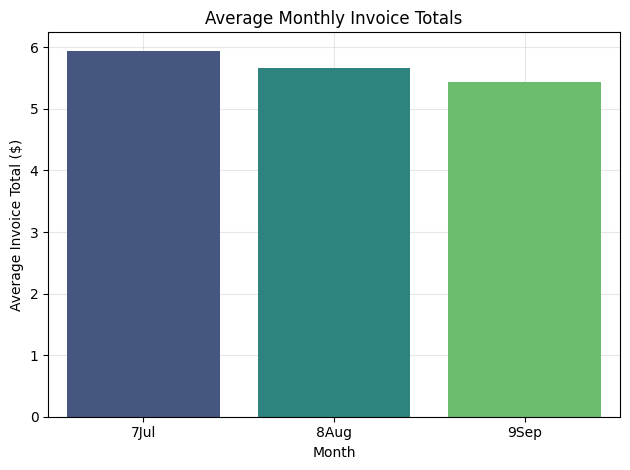

In [305]:
# Create a bar chart of avg_inv_by_month.
fig, ax = plt.subplots()

sns.barplot(data=avg_inv_by_month.reset_index(), 
            x=avg_inv_by_month.reset_index().columns[0], 
            y='total', palette="viridis", hue=avg_inv_by_month.reset_index().columns[0])

ax.set(xlabel="Month", ylabel="Average Invoice Total ($)", title="Average Monthly Invoice Totals")
ax.grid(True, alpha=0.3, zorder=0)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## Verifying Integrity in Merging and Concatenating Data

In practical data work, it is critical to ensure that merges and concatenations reflect the true relationships intended by your analysis. Data is often messy, with accidental duplicate keys, unexpected many-to-many links, or index clashes. **Verifying integrity** protects you from subtle logical errors and ensures that results remain interpretable, reproducible, and analytically sound.

This section covers the key strategies, Pandas features, and examples for checking data integrity during merges and concatenations. It explains the types of relationships, how to validate them, and what actions to take when issues are detected.


### Detecting Unintentional Relationships

### 1. Unintentional One-to-Many or Many-to-Many Relationships

- **One-to-many:** When a key in the left table links to multiple rows in the right table.
- **Many-to-many:** When both tables contain duplicate keys, leading to a Cartesian product—every matching left row combines with every matching right row.
- **Impact:** Results in data expansion and possible analytic errors (e.g., inflated counts, duplicate records).

### 2. Duplicate Records

- **Problem:** Duplicate keys or rows can arise from data entry errors, system glitches, or incomplete deduplication.
- **Impact:** Can compromise merges, aggregations, or groupby results.


### Validating Merges with `.merge(validate=...)`

The `validate` argument in `.merge()` allows you to explicitly check that your merge conforms to the expected relationship type:

| Validation Type   | Description                                             | Example Error      |
|-------------------|--------------------------------------------------------|--------------------|
| 'one_to_one'      | Each key in both tables is unique                      | MergeError: Merge keys are not unique in right/left dataset |
| 'one_to_many'     | Left keys unique, right keys may repeat                |                    |
| 'many_to_one'     | Right keys unique, left keys may repeat                |                    |
| 'many_to_many'    | Both tables may have duplicate keys (least strict)     |                    |

**Example: Verifying One-to-One Merge**

```python
merged = left_df.merge(
    right_df,
    on="key_column",
    validate="one_to_one"
)
```
If any key appears more than once in either table, a `MergeError` is raised.

**Example: One-to-Many Merge**

```python
merged = left_df.merge(
    right_df,
    on="key_column",
    validate="one_to_many"
)
```
- The left table must have unique keys; the right table can have duplicates.

**What if you get a MergeError?**
- Investigate with `df["key"].value_counts()` to find duplicate keys.
- Use `.drop_duplicates()` or otherwise fix the offending data.


### Verifying Concatenations with `verify_integrity`

When stacking tables vertically or horizontally, it’s possible to accidentally create duplicate index entries—leading to ambiguous or corrupted results.

**By default:**  
`pd.concat()` does **not** check for duplicate index values.

**Enable integrity checking:**

```python
pd.concat([df1, df2], verify_integrity=True)
```

- Raises a `ValueError` if the concatenated index contains any duplicates.

**Example Error:**

```
ValueError: Indexes have overlapping values: Int64Index([9], dtype='int64', name='iid')
```

**If you do not need index integrity:**

```python
pd.concat([df1, df2], verify_integrity=False)
```


### Why Verify Integrity?

- **Data in the real world is rarely pristine.**  
  Duplicates, unexpected relationships, and index clashes are common and can silently undermine your results.
- **Verifying integrity is preventive:**  
  It surfaces problems early, making them explicit and traceable rather than causing mysterious errors later.


### What To Do When Issues Are Found

- **Investigate the root cause:**  
  Use `value_counts()`, `.duplicated()`, and data inspection tools to diagnose.
- **Fix incorrect data:**  
  - Remove duplicates (`.drop_duplicates()`).
  - Standardise or clean key columns.
  - Restructure data to reflect true relationships.
- **Rethink your merge:**  
  Sometimes many-to-many merges are genuinely needed, but often they reflect a mistake in logic or preparation.


In [306]:
specs = pd.read_csv("data/track.csv")
specs = specs.rename(columns={"TrackId":"tid", "Milliseconds": "milliseconds", "Bytes":"bytes"}).drop(["Name", "AlbumId", "MediaTypeId", "GenreId", "Composer", "UnitPrice"], axis=1)
specs

,tid,milliseconds,bytes
0,1,343719,11170334
1,2,342562,5510424
2,3,230619,3990994
3,4,252051,4331779
4,5,375418,6290521
...,...,...,...
3498,3499,286741,4718950
3499,3500,139200,2283131
3500,3501,66639,1189062
3501,3502,221331,3665114


In [307]:
tracks.head()

,tid,name,aid,mtid,gid,composer,u_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
1,2,Balls to the Wall,2,2,1,NaN,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,0.99


In [308]:
tracks.merge(specs, on="tid", validate="one_to_one")

tracks

,tid,name,aid,mtid,gid,composer,u_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
1,2,Balls to the Wall,2,2,1,NaN,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,0.99
...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,NaN,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,0.99


In [309]:
albums = pd.read_csv("data/album.csv")
albums = albums.rename(columns={"AlbumId":"aid", "Title":"title", "ArtistId":"artid"})

albums

,aid,title,artid
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [310]:
albums.merge(tracks, on="aid", validate="one_to_many")

,aid,title,artid,tid,name,mtid,gid,composer,u_price
0,1,For Those About To Rock We Salute You,1,1,For Those About To Rock (We Salute You),1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
1,1,For Those About To Rock We Salute You,1,6,Put The Finger On You,1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
2,1,For Those About To Rock We Salute You,1,7,Let's Get It Up,1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
3,1,For Those About To Rock We Salute You,1,8,Inject The Venom,1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
4,1,For Those About To Rock We Salute You,1,9,Snowballed,1,1,"Angus Young, Malcolm Young, Brian Johnson",0.99
...,...,...,...,...,...,...,...,...,...
3498,343,Respighi:Pines of Rome,226,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,2,24,NaN,0.99
3499,344,Schubert: The Late String Quartets & String Qu...,272,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",2,24,Franz Schubert,0.99
3500,345,Monteverdi: L'Orfeo,273,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",2,24,Claudio Monteverdi,0.99
3501,346,Mozart: Chamber Music,274,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",2,24,Wolfgang Amadeus Mozart,0.99


In [311]:
pd.concat([inv_feb, inv_mar], verify_integrity=True)

,iid,cid,invoice_date,total
6,7,38,2009-02-01,1.98
7,8,40,2009-02-01,1.98
8,9,42,2009-02-02,3.96
9,10,46,2009-02-03,5.94
10,11,52,2009-02-06,8.91
...,...,...,...,...
346,347,47,2013-03-05,8.91
347,348,56,2013-03-10,13.86
348,349,11,2013-03-18,0.99
349,350,12,2013-03-31,1.98


### Validating a merge
You have been given 2 tables, artists, and albums. Merge them using artists.`merge(albums, on='artid').head()`, adjusting the `validate` argument to determine which statement is `False`.

In [312]:
artists = pd.read_csv("data/artist.csv")

artists = artists.rename(columns={"ArtistId":"artid","Name":"name" })

artists

,artid,name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


In [313]:
artists.merge(albums, on="artid")

,artid,name,aid,title
0,1,AC/DC,1,For Those About To Rock We Salute You
1,1,AC/DC,4,Let There Be Rock
2,2,Accept,2,Balls to the Wall
3,2,Accept,3,Restless and Wild
4,3,Aerosmith,5,Big Ones
...,...,...,...,...
342,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp",342,"Locatelli: Concertos for Violin, Strings and C..."
343,272,Emerson String Quartet,344,Schubert: The Late String Quartets & String Qu...
344,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",345,Monteverdi: L'Orfeo
345,274,Nash Ensemble,346,Mozart: Chamber Music


In [314]:
tracks_per_year = pd.read_sql_query("SELECT * FROM Track", conn)
tracks_per_year


,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


## Using `merge_ordered()`: Ordered Merges and Time Series Alignment


When working with **ordered data**—especially time series, panel data, or any data where order or chronology matters—merging must preserve and respect this sequence. The Pandas `pd.merge_ordered()` function is designed specifically for these use cases, enabling the alignment and combination of DataFrames along ordered keys (typically dates or times) while providing flexible options for forward-filling missing values.

This section rigorously explores the use of `merge_ordered()`, its differences from the standard `.merge()` method, and best practices for time series and chronologically ordered data.


### Method Comparison: `.merge()` vs. `merge_ordered()`

### Standard `.merge()` Method

- **Join columns:**  
  Specify with `on=`, `left_on=`, `right_on=`.
- **Type of join:**  
  Controlled by `how` parameter (`'left'`, `'right'`, `'inner'`, `'outer'`).  
  *Default:* `'inner'` (intersection).
- **Overlapping column names:**  
  Managed with `suffixes=`.
- **How to call:**  
  `df1.merge(df2, ...)` — called as a method on the DataFrame.
- **No guarantee of preserving order.**
- **Does not forward-fill missing values.**

### `pd.merge_ordered()` Function

- **Join columns:**  
  Use `on=`, `left_on=`, `right_on=`—same as `.merge()`.
- **Type of join:**  
  `how` parameter as above, *default:* `'outer'` (union).
- **Overlapping column names:**  
  Managed with `suffixes=`.
- **How to call:**  
  `pd.merge_ordered(df1, df2, ...)` — called as a function, not a DataFrame method.
- **Preserves order by the key (e.g., chronological order for dates).**
- **Can forward-fill missing values with the `fill_method` argument.**
- **Ideal for time series or sequence data.**


### Syntax: Using `merge_ordered()`

```python
import pandas as pd

result = pd.merge_ordered(
    left=df1,
    right=df2,
    on="date",              # or left_on/right_on for different column names
    how="outer",            # 'outer' (default), 'inner', 'left', or 'right'
    suffixes=("_df1", "_df2"),
    fill_method=None        # or "ffill" for forward fill
)
```

- **`on="date"`:** Joins on the date column (or any ordered key).
- **`how`:** Controls the type of join; outer by default includes all rows from both DataFrames.
- **`suffixes`:** Appends these suffixes to overlapping column names to avoid ambiguity.
- **`fill_method`:**  
  - `None` (default): No filling; missing values remain as `NaN`.
  - `"ffill"`: Forward fill — fills missing values with the most recent non-missing value **within each column** after the merge. This is especially useful for aligning irregular time series.


### Forward Fill Example

Suppose you have two time series DataFrames, each recording values on different dates:

```python
result = pd.merge_ordered(
    left=series1,
    right=series2,
    on="date",
    suffixes=("_s1", "_s2"),
    fill_method="ffill"
)
```

 Here, if a value is missing at a given date (because it wasn't observed in that DataFrame), it is filled with the most recent value prior to that date.


### When to Use `merge_ordered()`

- **Ordered or time series data:**  
  When aligning datasets on dates, times, or any naturally ordered keys.
- **Irregular sampling:**  
  When two datasets have measurements at different times and you want a union of all timestamps, possibly filling forward.
- **Panel data:**  
  Merging financial data (stocks, indexes), sensor readings, or logs where regularity is not guaranteed.
- **Chronological tracking:**  
  Tracking status, positions, or states as they evolve over time.


### Example: Merging Two Time Series with Forward Fill

```python
result = pd.merge_ordered(
    left=prices_a,
    right=prices_b,
    on="date",
    how="outer",
    suffixes=("_a", "_b"),
    fill_method="ffill"
)
```
 Both `prices_a` and `prices_b` may have missing dates. The merged result will cover all unique dates from both, with missing values filled forward where possible.


### Best Practices and Notes

- **Explicit order:**  
  The order of rows in the result always matches the join key's natural order - no need to sort after merging.
- **Use forward fill judiciously:**  
  Forward filling is useful for carrying the last known value forward, but make sure this reflects real-world logic in your data.
- **Validate results:**  
  Always inspect merged output for logical consistency - especially when joining on keys with non-overlapping or sparse observations.
- **Suffixes:**  
  Always specify suffixes when working with overlapping column names to avoid ambiguity.


In [315]:
import yfinance as yf

# Subsetting the 'aapl' table
aapl = (
    yf.Ticker("AAPL")
      .history(start="2007-01-01", interval="1mo", auto_adjust=True)
      .reset_index()[["Date", "Close"]]
      .rename(columns={"Date": "date", "Close": "close"})
)

aapl.head()

,date,close
0,2007-01-01 00:00:00-05:00,2.576545
1,2007-02-01 00:00:00-05:00,2.542885
2,2007-03-01 00:00:00-05:00,2.792334
3,2007-04-01 00:00:00-04:00,2.999408
4,2007-05-01 00:00:00-04:00,3.642267


In [316]:
# Subsetting the 'mcd' table
mcd = (
    yf.Ticker("MCD")
      .history(start="2007-01-01", interval="1mo", auto_adjust=True)
      .reset_index()[["Date", "Close"]]
      .rename(columns={"Date": "date", "Close": "close"})
)

mcd.head()


,date,close
0,2007-01-01 00:00:00-05:00,26.518940
1,2007-02-01 00:00:00-05:00,26.124304
2,2007-03-01 00:00:00-05:00,26.937517
3,2007-04-01 00:00:00-04:00,28.868879
4,2007-05-01 00:00:00-04:00,30.226200


In [317]:
pd.merge_ordered(aapl, mcd, on="date", suffixes=("_aapl", "_mcd"), fill_method="ffill")

,date,close_aapl,close_mcd
0,2007-01-01 00:00:00-05:00,2.576545,26.518940
1,2007-02-01 00:00:00-05:00,2.542885,26.124304
2,2007-03-01 00:00:00-05:00,2.792334,26.937517
3,2007-04-01 00:00:00-04:00,2.999408,28.868879
4,2007-05-01 00:00:00-04:00,3.642267,30.226200
...,...,...,...
217,2025-02-01 00:00:00-05:00,241.258011,304.831116
218,2025-03-01 00:00:00-05:00,221.839096,308.825287
219,2025-04-01 00:00:00-04:00,212.221710,317.847290
220,2025-05-01 00:00:00-04:00,200.586960,312.080017


### Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

In [318]:
sp500 = pd.read_csv("data/S&P500.csv")
sp500 = sp500.rename(columns={"Date":"date", "Returns":"returns"})
sp500.head()

,date,returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41


In [319]:
gdp = pd.read_csv("data/WorldBank_GDP.csv")
gdp = gdp.rename(columns={"Country Code":"country code", "Year":"year", "GDP":"gdp"}).drop(["Country Name", "Indicator Name"], axis=1)
gdp.head()

,country code,year,gdp
0,CHN,2010,6.087160e+12
1,DEU,2010,3.417090e+12
2,JPN,2010,5.700100e+12
3,USA,2010,1.499210e+13
4,CHN,2011,7.551500e+12


In [320]:
# Use merge_ordered() to merge gdp and sp500 using a left join where the year column from gdp is matched with the date column from sp500.
gdp_sp500 = pd.merge_ordered(gdp, sp500, 
                             left_on="year", right_on="date", 
                             how="left")

gdp_sp500["date"] = gdp_sp500["date"].fillna(0).astype(int)

# Print gdp_sp500
gdp_sp500

,country code,year,gdp,date,returns
0,CHN,2010,6.087160e+12,2010,12.78
1,DEU,2010,3.417090e+12,2010,12.78
2,JPN,2010,5.700100e+12,2010,12.78
3,USA,2010,1.499210e+13,2010,12.78
4,CHN,2011,7.551500e+12,2011,0.00
5,DEU,2011,3.757700e+12,2011,0.00
6,JPN,2011,6.157460e+12,2011,0.00
7,USA,2011,1.554260e+13,2011,0.00
8,CHN,2012,8.532230e+12,2012,13.41
9,DEU,2012,3.543980e+12,2012,13.41


Use the `merge_ordered()` function again, similar to before, to merge `gdp` and `sp500`, using the function's ability to fill in missing data for returns by `forward-filling` the missing values. Assign the resulting table to the variable `gdp_sp500`.

In [321]:
gdp_sp500 = pd.merge_ordered(gdp, sp500, 
                             left_on="year", right_on="date", how="left",
                             fill_method="ffill")

# Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.
gdp_returns = gdp_sp500[["gdp", "returns"]]

# Print the correlation matrix of the gdp_returns table using the .corr() method.
print(gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.040669
returns  0.040669  1.000000


### Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.<br>

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

In [322]:
inflation = pd.read_csv("data/inflation.csv", index_col=0)
unemployment = pd.read_csv("data/unemployment.csv", index_col=0)


In [323]:
unemployment.head()

,date,unemployment_rate
0,2013-06-01,7.5
1,2014-01-01,6.7
2,2014-06-01,6.1
3,2015-01-01,5.6
4,2015-06-01,5.3


In [324]:
inflation.head()

,date,cpi,seriesid,data_type
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
1,2014-02-01,235.547,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
2,2014-03-01,236.028,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
3,2014-04-01,236.468,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
4,2014-05-01,236.918,CUSR0000SA0,SEASONALLY ADJUSTED INDEX


In [325]:
# Use merge_ordered() to merge gdp and sp500 using a left join where the year column from gdp is matched with the date column from sp500.
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on="year", right_on="date", 
                             how="left")


gdp_sp500

,country code,year,gdp,date,returns
0,CHN,2010,6.087160e+12,2010.0,12.78
1,DEU,2010,3.417090e+12,2010.0,12.78
2,JPN,2010,5.700100e+12,2010.0,12.78
3,USA,2010,1.499210e+13,2010.0,12.78
4,CHN,2011,7.551500e+12,2011.0,0.00
5,DEU,2011,3.757700e+12,2011.0,0.00
6,JPN,2011,6.157460e+12,2011.0,0.00
7,USA,2011,1.554260e+13,2011.0,0.00
8,CHN,2012,8.532230e+12,2012.0,13.41
9,DEU,2012,3.543980e+12,2012.0,13.41


In [326]:
# Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy.
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on="date", how="inner")

inflation_unemploy

,date,cpi,seriesid,data_type,unemployment_rate
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.7
1,2014-06-01,237.231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.1
2,2015-01-01,234.718,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.6
3,2015-06-01,237.684,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.3
4,2016-01-01,237.833,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.0
5,2016-06-01,240.167,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.9
6,2017-01-01,243.780,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.7
7,2017-06-01,244.182,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.3
8,2018-01-01,248.884,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.1
9,2018-06-01,251.134,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.0


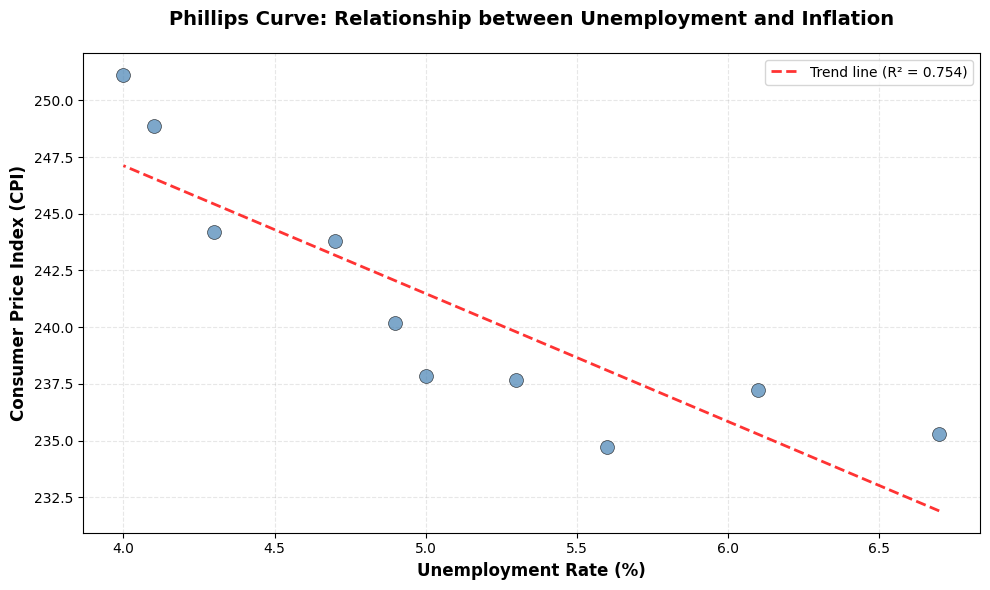

In [327]:
from scipy import stats

# Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis.
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot with improved styling
sns.scatterplot(data=inflation_unemploy, x="unemployment_rate", y="cpi", 
                s=100, alpha=0.7, color='steelblue', edgecolor='black', linewidth=0.5)

# Add labels and title
ax.set_xlabel("Unemployment Rate (%)", fontsize=12, fontweight='bold')
ax.set_ylabel("Consumer Price Index (CPI)", fontsize=12, fontweight='bold')
ax.set_title("Phillips Curve: Relationship between Unemployment and Inflation", 
             fontsize=14, fontweight='bold', pad=20)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Improve tick formatting
ax.tick_params(axis='both', which='major', labelsize=10)

# Add a trend line to show the relationship
slope, intercept, r_value, p_value, std_err = stats.linregress(inflation_unemploy['unemployment_rate'], inflation_unemploy['cpi'])
line = slope * inflation_unemploy['unemployment_rate'] + intercept
ax.plot(inflation_unemploy['unemployment_rate'], line, 'r--', alpha=0.8, linewidth=2, label=f'Trend line (R² = {r_value**2:.3f})')

# Add legend
ax.legend(loc='best', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

In [328]:
pop = pd.read_csv("data/pop.csv", index_col=0)
pop

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL
5,1991-01-01,Sweden,8617375,SP.POP.TOTL
6,1992-01-01,Sweden,8668067,SP.POP.TOTL
7,1993-01-01,Sweden,8718561,SP.POP.TOTL


In [329]:
gdp_ffill = pd.read_csv("data/gdp-ffill.csv")
gdp_ffill

,Unnamed: 0,date,country,gdp,series_code
0,0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD
1,1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD
2,2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD
3,3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD
4,4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD
5,5,1991-04-01,Australia,155989.03270,NYGDPMKTPSAKD
6,6,1991-07-01,Australia,156635.85760,NYGDPMKTPSAKD
7,7,1991-09-01,Australia,156744.05660,NYGDPMKTPSAKD
8,8,1992-01-01,Australia,157916.08110,NYGDPMKTPSAKD
9,9,1992-04-01,Australia,159047.82710,NYGDPMKTPSAKD


In [330]:
# Use merge_ordered() on gdp and pop, merging on columns year and country code with the fill feature, save to ctry_date.
ctry_date = pd.merge_ordered(gdp_ffill, pop, on=['date', 'country'], fill_method="ffill")
ctry_date

,Unnamed: 0,date,country,gdp,series_code_x,pop,series_code_y
0,0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,16,1990-01-01,Sweden,79837.84599,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,17,1990-04-01,Sweden,80582.28597,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
5,18,1990-07-01,Sweden,79974.36017,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
6,3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
7,19,1990-09-01,Sweden,80106.49738,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
8,4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
9,20,1991-01-01,Sweden,79524.24192,NYGDPMKTPSAKD,8617375,SP.POP.TOTL


In [331]:
# Perform the same merge of gdp and pop, but join on country and date (reverse of step 1) with the fill feature, saving this as date_ctry.
date_ctry = pd.merge_ordered(gdp_ffill, pop, on=["country", "date"], fill_method="ffill")
date_ctry

,Unnamed: 0,date,country,gdp,series_code_x,pop,series_code_y
0,0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
5,5,1991-04-01,Australia,155989.03270,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
6,6,1991-07-01,Australia,156635.85760,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
7,7,1991-09-01,Australia,156744.05660,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
8,8,1992-01-01,Australia,157916.08110,NYGDPMKTPSAKD,17495000,SP.POP.TOTL
9,9,1992-04-01,Australia,159047.82710,NYGDPMKTPSAKD,17495000,SP.POP.TOTL


## Using `merge_asof()`: Nearest-Match and Time-Aware Joins

In time series and event-driven data, it’s often necessary to merge tables **not on exact key matches**, but on the *nearest* key value. This occurs when measurements from different sources are recorded at slightly different times, or when you want to match each event to the most recent (or next) related event in another table. Pandas' `pd.merge_asof()` enables precisely this sort of *nearest-key* join, making it an indispensable tool for financial, sensor, or process data.


### How `merge_asof()` Works

- **Nearest-key join:**  
  For each row in the left table, `merge_asof()` matches the closest row in the right table on a sorted key (often a timestamp), not necessarily requiring exact equality.
- **Join type:**  
  Always a “left” join: each row in the left table is matched with the nearest eligible row in the right.
- **Ordering:**  
  Both DataFrames **must be sorted** by the merge key before joining.
- **Other features:**  
  - Similar API to `merge_ordered()`.
  - Suffixes for overlapping columns.
  - Directional control (backward, forward, or nearest).


### Syntax: Basic `merge_asof()` Usage

```python
import pandas as pd

result = pd.merge_asof(
    left=left_df,
    right=right_df,
    on="key_column",                  # typically a datetime or ordered numeric
    suffixes=("_left", "_right")
)
```

- Each row in `left_df` is matched with the *latest* row in `right_df` whose `key_column` is less than or equal to that in `left_df`.
- This is especially useful when observations in the right table occur *before* or *at* the same time as those in the left.

### Example: Nearest Timestamp Join

```python
result = pd.merge_asof(
    left=visa,
    right=ibm,
    on="date_time",
    suffixes=("_visa", "_ibm")
)
```

- For each transaction in `visa`, the result will include the latest available IBM price *at or before* the same timestamp.



### Using the `direction` Argument

Control the direction of the nearest match:

- **Default:** `"backward"` — matches to the latest key less than or equal to the left key.
- **`"forward"`:** matches to the earliest key greater than or equal to the left key.
- **`"nearest"`:** matches to the nearest key, regardless of direction.

**Example: Forward Direction**

```python
result = pd.merge_asof(
    left=visa,
    right=ibm,
    on="date_time",
    suffixes=("_visa", "_ibm"),
    direction="forward"
)
```


### When to Use `merge_asof()`

- **Time series sampled at irregular intervals:**  
  For aligning sensor logs, financial trades, or observational data with slightly mismatched times.
- **Developing lag features for modelling:**  
  For creating training sets where you join each observation to the most recent “as of” state in another table, *preventing data leakage* (i.e., only using information available up to that moment).
- **Event annotation:**  
  For tagging events with the nearest relevant reference or context in process data.

### Best Practices

- **Always sort:**  
  Both DataFrames must be sorted by the merge key before calling `merge_asof()`.
- **Check direction:**  
  Use the `direction` argument to match the join logic to your business or analytical requirements.
- **Inspect matches:**  
  Carefully check for rows without a match (which will have `NaN` in right-side columns).


`merge_asof()` is a sophisticated Pandas tool for time-aware, nearest-neighbour joining of ordered data. It is critical for constructing feature-rich, leakage-free datasets in financial, sensor, and event-based analytics, where exact key matches are rare but temporal proximity is crucial.


In [332]:
# Get hourly data for VISA on September 17, 2024
visa = (
    yf.Ticker("V")
      .history(start="2024-09-17", end="2024-09-18", interval="1h", auto_adjust=True)
      .reset_index()[["Datetime", "Close"]]
      .rename(columns={"Datetime": "date_time", "Close": "close"})
)

visa

,date_time,close
0,2024-09-17 09:30:00-04:00,292.359985
1,2024-09-17 10:30:00-04:00,292.609985
2,2024-09-17 11:30:00-04:00,292.609985
3,2024-09-17 12:30:00-04:00,292.100006
4,2024-09-17 13:30:00-04:00,292.060486
5,2024-09-17 14:30:00-04:00,291.720001
6,2024-09-17 15:30:00-04:00,291.690002


In [333]:
# Get hourly data for IBM on September 17, 2024
ibm = (
    yf.Ticker("IBM")
      .history(start="2024-09-17", end="2024-09-18", interval="1h", auto_adjust=True)
      .reset_index()[["Datetime", "Close"]]
      .rename(columns={"Datetime": "date_time", "Close": "close"})
)

ibm 

,date_time,close
0,2024-09-17 09:30:00-04:00,214.770004
1,2024-09-17 10:30:00-04:00,214.070007
2,2024-09-17 11:30:00-04:00,213.690002
3,2024-09-17 12:30:00-04:00,213.800003
4,2024-09-17 13:30:00-04:00,214.335007
5,2024-09-17 14:30:00-04:00,213.871002
6,2024-09-17 15:30:00-04:00,214.119995


In [334]:
pd.merge_asof(visa, ibm, on="date_time", 
              suffixes=("_visa", "_ibm"), direction="forward")

,date_time,close_visa,close_ibm
0,2024-09-17 09:30:00-04:00,292.359985,214.770004
1,2024-09-17 10:30:00-04:00,292.609985,214.070007
2,2024-09-17 11:30:00-04:00,292.609985,213.690002
3,2024-09-17 12:30:00-04:00,292.100006,213.800003
4,2024-09-17 13:30:00-04:00,292.060486,214.335007
5,2024-09-17 14:30:00-04:00,291.720001,213.871002
6,2024-09-17 15:30:00-04:00,291.690002,214.119995


### Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

In [335]:
jpm = pd.read_csv("data/jpm.csv", index_col=0, parse_dates=["date_time"]).sort_values("date_time")
wells = pd.read_csv("data/wells.csv", index_col=0, parse_dates=["date_time"]).sort_values("date_time")
bac=pd.read_csv("data/bac.csv", index_col=0, parse_dates=["date_time"]).sort_values("date_time")

In [336]:
jpm

,date_time,close
0,2017-11-17 15:35:17,98.1200
1,2017-11-17 15:40:04,98.1800
2,2017-11-17 15:45:01,97.7307
3,2017-11-17 15:50:55,97.7400
4,2017-11-17 15:55:00,97.8150
5,2017-11-17 16:00:30,98.0200
6,2017-11-17 16:05:07,97.8000
7,2017-11-17 16:10:08,97.8400
8,2017-11-17 16:15:11,97.7100
9,2017-11-17 16:20:29,97.7600


In [337]:
wells

,date_time,close
0,2017-11-17 15:35:08,54.3227
1,2017-11-17 15:40:00,54.3200
2,2017-11-17 15:45:32,54.1900
3,2017-11-17 15:50:07,54.1700
4,2017-11-17 15:55:00,54.1841
5,2017-11-17 16:00:30,54.2650
6,2017-11-17 16:05:52,54.2000
7,2017-11-17 16:10:22,54.1550
8,2017-11-17 16:15:43,54.1900
9,2017-11-17 16:20:07,54.2050


In [338]:
bac

,date_time,close
0,2017-11-17 15:35:17,26.552
1,2017-11-17 15:40:06,26.552
2,2017-11-17 15:45:05,26.388
3,2017-11-17 15:50:34,26.378
4,2017-11-17 15:55:06,26.383
5,2017-11-17 16:00:18,26.452
6,2017-11-17 16:05:20,26.373
7,2017-11-17 16:10:05,26.388
8,2017-11-17 16:15:07,26.369
9,2017-11-17 16:20:29,26.388


In [339]:
# Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.
jpm_wells = pd.merge_asof(jpm, wells, on="date_time", suffixes=('', '_wells'), direction='nearest')
jpm_wells

,date_time,close,close_wells
0,2017-11-17 15:35:17,98.1200,54.3227
1,2017-11-17 15:40:04,98.1800,54.3200
2,2017-11-17 15:45:01,97.7307,54.1900
3,2017-11-17 15:50:55,97.7400,54.1700
4,2017-11-17 15:55:00,97.8150,54.1841
5,2017-11-17 16:00:30,98.0200,54.2650
6,2017-11-17 16:05:07,97.8000,54.2000
7,2017-11-17 16:10:08,97.8400,54.1550
8,2017-11-17 16:15:11,97.7100,54.1900
9,2017-11-17 16:20:29,97.7600,54.2050


In [340]:
# Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on="date_time", direction="nearest", suffixes=("_jpm", "_bac"))

jpm_wells_bac

,date_time,close_jpm,close_wells,close_bac
0,2017-11-17 15:35:17,98.1200,54.3227,26.552
1,2017-11-17 15:40:04,98.1800,54.3200,26.552
2,2017-11-17 15:45:01,97.7307,54.1900,26.388
3,2017-11-17 15:50:55,97.7400,54.1700,26.378
4,2017-11-17 15:55:00,97.8150,54.1841,26.383
5,2017-11-17 16:00:30,98.0200,54.2650,26.452
6,2017-11-17 16:05:07,97.8000,54.2000,26.373
7,2017-11-17 16:10:08,97.8400,54.1550,26.388
8,2017-11-17 16:15:11,97.7100,54.1900,26.369
9,2017-11-17 16:20:29,97.7600,54.2050,26.388


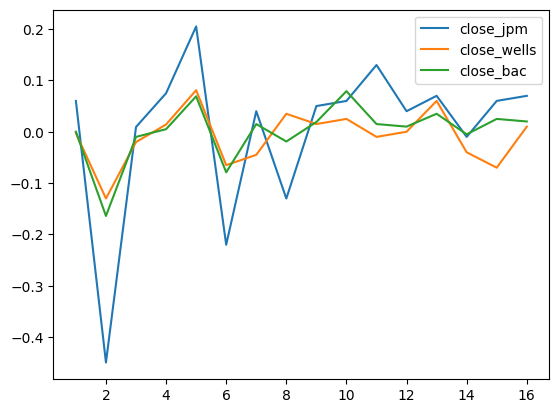

In [341]:
# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

In [342]:
recession = pd.read_csv("data/recession.csv", index_col=0, parse_dates=["date"]).sort_values("date")
recession

,date,econ_status
0,1980-01-01,recession
1,1980-08-01,normal
2,1981-07-01,recession
3,1982-12-01,normal
4,1990-07-01,recession
5,1991-04-01,normal
6,2001-03-01,recession
7,2001-12-01,normal
8,2007-12-01,recession
9,2009-07-01,normal


In [343]:
gdp_date = pd.read_csv("data/gdp_date.csv", index_col=0, parse_dates=["date"]).sort_values("date")
gdp_date

,date,gdp
0,1979-01-01,2526.610
1,1979-04-01,2591.247
2,1979-07-01,2667.565
3,1979-10-01,2723.883
4,1980-01-01,2789.842
5,1980-04-01,2797.352
6,1980-07-01,2856.483
7,1980-10-01,2985.557
8,1981-01-01,3124.206
9,1981-04-01,3162.532


In [345]:
# Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.
gdp_recession = pd.merge_asof(gdp_date, recession, on="date")
gdp_recession

,date,gdp,econ_status
0,1979-01-01,2526.610,NaN
1,1979-04-01,2591.247,NaN
2,1979-07-01,2667.565,NaN
3,1979-10-01,2723.883,NaN
4,1980-01-01,2789.842,recession
5,1980-04-01,2797.352,recession
6,1980-07-01,2856.483,recession
7,1980-10-01,2985.557,normal
8,1981-01-01,3124.206,normal
9,1981-04-01,3162.532,normal


In [ ]:
# Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.
is_recession = ["r" if s =="recession" else "g" for s in gdp_recession["econ_status"]]

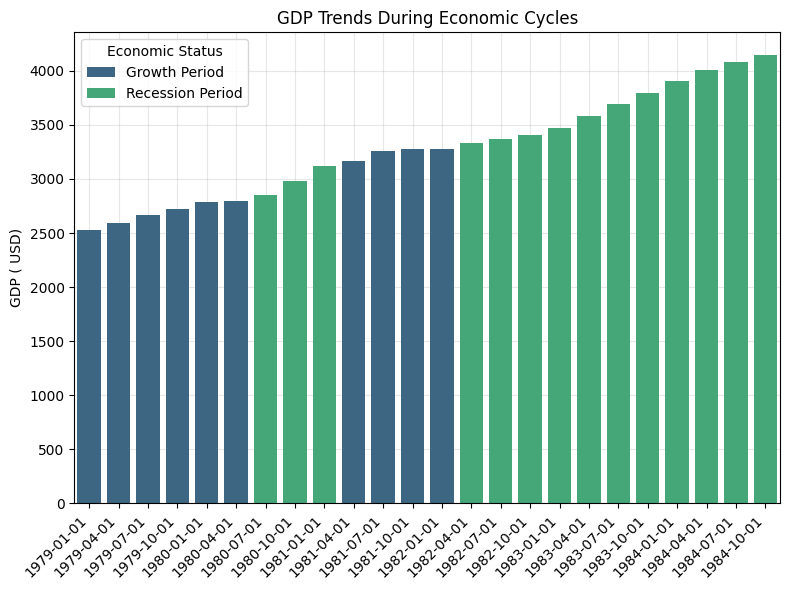

In [ ]:
# Plot a bar chart of gdp_recession
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=gdp_recession, y="gdp", x="date", hue=is_recession, palette="viridis")
ax.set(xlabel="", ylabel="GDP ( USD)", title="GDP Trends During Economic Cycles")

# Create custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Growth Period', 'Recession Period'], title='Economic Status', loc='upper left')

ax.set_axisbelow(True)
ax.grid(True, alpha=0.3, zorder=0)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
